In [1]:
import pandas as pd
from collections import defaultdict
import warnings
import visualize
import neat
import multiprocessing
import os
import matplotlib.pyplot as plt

import numpy as np

from sklearn.datasets import load_digits
digits = load_digits()

In [2]:
X = digits.images.reshape(digits.images.shape[0], digits.images.shape[1] * digits.images.shape[2])[:1617]
y = digits.target[:1617]

In [3]:
necoc = 100
generations = int(3000/necoc)
generations

30

In [4]:
def softmax(x, axis=1):
    # 计算每行的最大值
    row_max = x.max(axis=axis)
 
    # 每行元素都需要减去对应的最大值，否则求exp(x)会溢出，导致inf情况
    row_max=row_max.reshape(-1, 1)
    x = x - row_max
 
    # 计算e的指数次幂
    x_exp = np.exp(x)
    x_sum = np.sum(x_exp, axis=axis, keepdims=True)
    s = x_exp / x_sum
    return s

In [5]:
def get_winner(class1):
    
    numbers = [*range(10)] # number 2 > number 1
    number_of_classification = len(numbers)
    #number_of_sampling = 100

    list_y = y.tolist()
    digits_indexes = []
    for digit in numbers:
        li = [i for i in range(len(list_y)) if list_y[i] == digit]
        digits_indexes.extend([li])

        
    class2 = []

    class1_indexes = []
    class2_indexes = []

    for i in numbers:
        if i in class1:
            class1_indexes.extend(digits_indexes[i])
        else:
            class2_indexes.extend(digits_indexes[i])
            class2.append(i)

    class1_label = [1] * len(class1_indexes)
    class2_label = [0] * len(class2_indexes)

    print("number of class1:{}".format(len(class1_label)))
    print("number of class2:{}".format(len(class2_label)))

    samplesize = 1617
    x_inputs =[tuple(c) for c in X[class1_indexes].tolist()] + [tuple(c) for c in X[class2_indexes].tolist()]
    x_outputs = [tuple([c]) for c in class1_label + class2_label]
    
    
    def eval_genomes(genomes, config):
        for genome_id, genome in genomes:
            net = neat.nn.FeedForwardNetwork.create(genome, config)

            outputs = []
            for xi in x_inputs:
                output = net.activate(xi)
                outputs.append(output)


            px_outputs = softmax(np.array(outputs).reshape(samplesize, 2), axis=1)
            # the index of maximum in each line
            pred_outputs = np.argmax(px_outputs, axis = 1)
            real_outputs = np.array(x_outputs).reshape(samplesize,)

            acc = np.sum(pred_outputs == real_outputs)/samplesize

            genome.fitness = acc

    def run(config_file):
        # Load configuration.
        config = neat.Config(
            neat.DefaultGenome,
            neat.DefaultReproduction,
            neat.DefaultSpeciesSet,
            neat.DefaultStagnation,
            config_file,
        )

        # Create the population, which is the top-level object for a NEAT run.
        p = neat.Population(config)

        # add a stdout reporter to show progress in the terminal
        reporter = neat.StdOutReporter(False)
        p.add_reporter(reporter)
        stats = neat.StatisticsReporter()
        p.add_reporter(stats)
        #checkpointer = neat.Checkpointer(100)
        #p.add_reporter(checkpointer)
        # Run for up to 300 generations.
        winner = p.run(eval_genomes, generations)

        return [stats, winner]
    
    local_dir = os.getcwd()
    config_path = os.path.join(local_dir, "config-feedforward-mnist2")
    [stats, winner] = run(config_path)
    
    return winner

In [6]:
import numpy as np
import random
while True:
    number_codes = []
    for i in range(2**(10-1), 2**10-1):
        for j in bin(i).split('b')[1]:
            number_codes.append(int(j))
    number_codes = np.array(number_codes).reshape(2**9 - 1,10).T     

    slice = random.sample(range(511), necoc)

    number_codes = number_codes[:,slice].tolist()

    classes = []
    for i in range(necoc):
        code_list = np.array(number_codes).T[i]
        classes.append(np.where(code_list==1)[0].tolist())

    matrix_errors = []

    for i in range(9):
        for j in range(i+1,10):
            matrix_errors.append(necoc - np.sum(np.array(number_codes[i]) == np.array(number_codes[j])))
    min_error = np.min(matrix_errors)
    if min_error != 0:
        print(min_error)
        #print(number_codes)
        break

41


In [7]:
len(number_codes[0])

100

In [8]:
winner_list = []

for i,class1 in enumerate(classes):
    print("running:{}/100".format(i))
    winner = get_winner(class1)
    winner_list.append(winner)

running:0/100
number of class1:485
number of class2:1132

 ****** Running generation 0 ****** 

Population's average fitness: 0.54834 stdev: 0.14870
Best fitness: 0.75263 - size: (2, 13) - species 7 - id 47
Average adjusted fitness: 0.283
Mean genetic distance 2.942, standard deviation 0.493
Population of 200 members in 26 species
Total extinctions: 0
Generation time: 15.918 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.60813 stdev: 0.14516
Best fitness: 0.80458 - size: (3, 15) - species 5 - id 283
Average adjusted fitness: 0.324
Mean genetic distance 2.991, standard deviation 0.476
Population of 203 members in 27 species
Total extinctions: 0
Generation time: 17.913 sec (16.916 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.62031 stdev: 0.14506
Best fitness: 0.80458 - size: (3, 15) - species 5 - id 283
Average adjusted fitness: 0.343
Mean genetic distance 3.034, standard deviation 0.478
Population of 203 members in 29 specie

Population's average fitness: 0.68156 stdev: 0.14791
Best fitness: 0.83859 - size: (6, 21) - species 34 - id 3359
Average adjusted fitness: 0.491
Mean genetic distance 3.214, standard deviation 0.492
Population of 198 members in 34 species
Total extinctions: 0
Generation time: 11.260 sec (10.888 average)

 ****** Running generation 25 ****** 

Population's average fitness: 0.67880 stdev: 0.15220
Best fitness: 0.83859 - size: (6, 21) - species 34 - id 3359
Average adjusted fitness: 0.411
Mean genetic distance 3.234, standard deviation 0.502
Population of 189 members in 34 species
Total extinctions: 0
Generation time: 11.316 sec (10.971 average)

 ****** Running generation 26 ****** 

Population's average fitness: 0.67876 stdev: 0.14766
Best fitness: 0.83859 - size: (6, 21) - species 34 - id 3359
Average adjusted fitness: 0.420
Mean genetic distance 3.241, standard deviation 0.492
Population of 197 members in 34 species
Total extinctions: 0
Generation time: 10.928 sec (11.001 average)

 

Population's average fitness: 0.58734 stdev: 0.08159
Best fitness: 0.76562 - size: (4, 14) - species 21 - id 1688
Average adjusted fitness: 0.179
Mean genetic distance 3.297, standard deviation 0.513
Population of 199 members in 36 species
Total extinctions: 0
Generation time: 10.264 sec (10.121 average)

 ****** Running generation 19 ****** 

Population's average fitness: 0.59405 stdev: 0.08096
Best fitness: 0.76562 - size: (4, 14) - species 21 - id 1688
Average adjusted fitness: 0.201
Mean genetic distance 3.302, standard deviation 0.502
Population of 194 members in 36 species
Total extinctions: 0
Generation time: 9.505 sec (10.094 average)

 ****** Running generation 20 ****** 

Population's average fitness: 0.58787 stdev: 0.08330
Best fitness: 0.76562 - size: (4, 14) - species 21 - id 1688
Average adjusted fitness: 0.233
Mean genetic distance 3.314, standard deviation 0.509
Population of 194 members in 35 species
Total extinctions: 0
Generation time: 8.350 sec (9.956 average)

 ***

Population's average fitness: 0.61627 stdev: 0.08642
Best fitness: 0.80148 - size: (4, 17) - species 24 - id 1694
Average adjusted fitness: 0.265
Mean genetic distance 3.132, standard deviation 0.488
Population of 204 members in 39 species
Total extinctions: 0
Generation time: 8.024 sec (7.667 average)

 ****** Running generation 13 ****** 

Population's average fitness: 0.61603 stdev: 0.09618
Best fitness: 0.80148 - size: (4, 17) - species 24 - id 1694
Average adjusted fitness: 0.238
Mean genetic distance 3.143, standard deviation 0.482
Population of 197 members in 41 species
Total extinctions: 0
Generation time: 8.470 sec (7.692 average)

 ****** Running generation 14 ****** 

Population's average fitness: 0.61765 stdev: 0.09337
Best fitness: 0.80148 - size: (4, 17) - species 24 - id 1694
Average adjusted fitness: 0.258
Mean genetic distance 3.183, standard deviation 0.486
Population of 193 members in 41 species
Total extinctions: 0
Generation time: 8.108 sec (7.765 average)

 ******

Population's average fitness: 0.58916 stdev: 0.09282
Best fitness: 0.78973 - size: (3, 14) - species 1 - id 1052
Average adjusted fitness: 0.234
Mean genetic distance 3.095, standard deviation 0.482
Population of 196 members in 38 species
Total extinctions: 0
Generation time: 9.617 sec (7.458 average)

 ****** Running generation 7 ****** 

Population's average fitness: 0.59614 stdev: 0.08328
Best fitness: 0.78973 - size: (3, 14) - species 1 - id 1052
Average adjusted fitness: 0.225
Mean genetic distance 3.112, standard deviation 0.496
Population of 198 members in 38 species
Total extinctions: 0
Generation time: 7.358 sec (7.446 average)

 ****** Running generation 8 ****** 

Population's average fitness: 0.60412 stdev: 0.07748
Best fitness: 0.78973 - size: (3, 14) - species 1 - id 1052
Average adjusted fitness: 0.205
Mean genetic distance 3.108, standard deviation 0.499
Population of 202 members in 40 species
Total extinctions: 0
Generation time: 7.565 sec (7.459 average)

 ****** Runn

Population's average fitness: 0.48094 stdev: 0.09556
Best fitness: 0.74459 - size: (2, 13) - species 1 - id 137
Average adjusted fitness: 0.148
Mean genetic distance 2.867, standard deviation 0.457
Population of 201 members in 21 species
Total extinctions: 0
Generation time: 6.259 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.52682 stdev: 0.09602
Best fitness: 0.74459 - size: (2, 13) - species 1 - id 137
Average adjusted fitness: 0.198
Mean genetic distance 2.933, standard deviation 0.451
Population of 201 members in 24 species
Total extinctions: 0
Generation time: 6.602 sec (6.430 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.54257 stdev: 0.09525
Best fitness: 0.74459 - size: (2, 13) - species 7 - id 137
Average adjusted fitness: 0.166
Mean genetic distance 2.947, standard deviation 0.460
Population of 205 members in 27 species
Total extinctions: 0
Generation time: 6.887 sec (6.583 average)

 ****** Running generation 3 **

Mean genetic distance 3.196, standard deviation 0.559
Population of 191 members in 26 species
Total extinctions: 0
Generation time: 8.089 sec (8.183 average)

 ****** Running generation 25 ****** 

Population's average fitness: 0.61127 stdev: 0.10869
Best fitness: 0.77737 - size: (8, 27) - species 12 - id 3340
Average adjusted fitness: 0.288
Mean genetic distance 3.242, standard deviation 0.548
Population of 195 members in 25 species
Total extinctions: 0
Generation time: 8.225 sec (8.170 average)

 ****** Running generation 26 ****** 

Population's average fitness: 0.60977 stdev: 0.10629
Best fitness: 0.77737 - size: (8, 27) - species 12 - id 3340
Average adjusted fitness: 0.268
Mean genetic distance 3.280, standard deviation 0.537
Population of 198 members in 23 species
Total extinctions: 0
Generation time: 8.642 sec (8.216 average)

 ****** Running generation 27 ****** 

Population's average fitness: 0.62167 stdev: 0.09616
Best fitness: 0.77737 - size: (8, 27) - species 12 - id 3340


Mean genetic distance 3.232, standard deviation 0.480
Population of 202 members in 42 species
Total extinctions: 0
Generation time: 9.490 sec (8.536 average)

 ****** Running generation 19 ****** 

Population's average fitness: 0.65231 stdev: 0.15007
Best fitness: 0.83364 - size: (4, 17) - species 2 - id 1006
Average adjusted fitness: 0.353
Mean genetic distance 3.250, standard deviation 0.486
Population of 195 members in 41 species
Total extinctions: 0
Generation time: 10.280 sec (8.765 average)

 ****** Running generation 20 ****** 

Population's average fitness: 0.66461 stdev: 0.14405
Best fitness: 0.83364 - size: (4, 17) - species 2 - id 1006
Average adjusted fitness: 0.437
Mean genetic distance 3.245, standard deviation 0.483
Population of 194 members in 40 species
Total extinctions: 0
Generation time: 8.343 sec (8.791 average)

 ****** Running generation 21 ****** 

Population's average fitness: 0.66867 stdev: 0.14094
Best fitness: 0.83364 - size: (4, 17) - species 2 - id 1006
Av

Mean genetic distance 3.190, standard deviation 0.495
Population of 200 members in 36 species
Total extinctions: 0
Generation time: 7.929 sec (7.757 average)

 ****** Running generation 13 ****** 

Population's average fitness: 0.60408 stdev: 0.10394
Best fitness: 0.74459 - size: (4, 16) - species 13 - id 1838
Average adjusted fitness: 0.224
Mean genetic distance 3.207, standard deviation 0.493
Population of 199 members in 37 species
Total extinctions: 0
Generation time: 8.175 sec (7.851 average)

 ****** Running generation 14 ****** 

Population's average fitness: 0.60873 stdev: 0.10039
Best fitness: 0.74459 - size: (4, 16) - species 37 - id 1838
Average adjusted fitness: 0.225
Mean genetic distance 3.196, standard deviation 0.498
Population of 202 members in 37 species
Total extinctions: 0
Generation time: 8.356 sec (7.953 average)

 ****** Running generation 15 ****** 

Population's average fitness: 0.60899 stdev: 0.10388
Best fitness: 0.74459 - size: (4, 16) - species 37 - id 1838


Mean genetic distance 3.096, standard deviation 0.489
Population of 202 members in 37 species
Total extinctions: 0
Generation time: 7.673 sec (7.247 average)

 ****** Running generation 7 ****** 

Population's average fitness: 0.59433 stdev: 0.10864
Best fitness: 0.77242 - size: (4, 14) - species 1 - id 1204
Average adjusted fitness: 0.232
Mean genetic distance 3.099, standard deviation 0.488
Population of 196 members in 37 species
Total extinctions: 0
Generation time: 7.908 sec (7.330 average)

 ****** Running generation 8 ****** 

Population's average fitness: 0.60395 stdev: 0.10616
Best fitness: 0.77242 - size: (4, 14) - species 1 - id 1204
Average adjusted fitness: 0.252
Mean genetic distance 3.113, standard deviation 0.494
Population of 196 members in 37 species
Total extinctions: 0
Generation time: 7.961 sec (7.400 average)

 ****** Running generation 9 ****** 

Population's average fitness: 0.61382 stdev: 0.10431
Best fitness: 0.77242 - size: (4, 14) - species 1 - id 1204
Averag

Population's average fitness: 0.52883 stdev: 0.05778
Best fitness: 0.68955 - size: (2, 13) - species 6 - id 172
Average adjusted fitness: 0.157
Mean genetic distance 3.029, standard deviation 0.487
Population of 196 members in 30 species
Total extinctions: 0
Generation time: 6.685 sec (7.156 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.54005 stdev: 0.06393
Best fitness: 0.70934 - size: (2, 13) - species 2 - id 526
Average adjusted fitness: 0.190
Mean genetic distance 3.011, standard deviation 0.478
Population of 202 members in 32 species
Total extinctions: 0
Generation time: 6.934 sec (7.082 average)

 ****** Running generation 3 ****** 

Population's average fitness: 0.54432 stdev: 0.06156
Best fitness: 0.70934 - size: (2, 13) - species 2 - id 526
Average adjusted fitness: 0.186
Mean genetic distance 3.031, standard deviation 0.477
Population of 206 members in 34 species
Total extinctions: 0
Generation time: 7.223 sec (7.117 average)

 ****** Running

Population's average fitness: 0.59790 stdev: 0.08215
Best fitness: 0.76500 - size: (6, 20) - species 49 - id 2226
Average adjusted fitness: 0.160
Mean genetic distance 3.204, standard deviation 0.468
Population of 196 members in 38 species
Total extinctions: 0
Generation time: 8.278 sec (8.223 average)

 ****** Running generation 26 ****** 

Population's average fitness: 0.59623 stdev: 0.08603
Best fitness: 0.76500 - size: (6, 20) - species 49 - id 2226
Average adjusted fitness: 0.258
Mean genetic distance 3.168, standard deviation 0.477
Population of 204 members in 38 species
Total extinctions: 0
Generation time: 8.633 sec (8.324 average)

 ****** Running generation 27 ****** 

Population's average fitness: 0.59072 stdev: 0.08356
Best fitness: 0.76500 - size: (6, 20) - species 49 - id 2226
Average adjusted fitness: 0.175
Mean genetic distance 3.175, standard deviation 0.480
Population of 199 members in 37 species
Total extinctions: 0
Generation time: 8.932 sec (8.404 average)

 ******

Population's average fitness: 0.63221 stdev: 0.10903
Best fitness: 0.80643 - size: (4, 15) - species 28 - id 1640
Average adjusted fitness: 0.253
Mean genetic distance 3.268, standard deviation 0.467
Population of 207 members in 38 species
Total extinctions: 0
Generation time: 8.744 sec (8.665 average)

 ****** Running generation 20 ****** 

Population's average fitness: 0.63495 stdev: 0.11069
Best fitness: 0.80643 - size: (4, 15) - species 28 - id 1640
Average adjusted fitness: 0.249
Mean genetic distance 3.287, standard deviation 0.465
Population of 206 members in 37 species
Total extinctions: 0
Generation time: 8.985 sec (8.697 average)

 ****** Running generation 21 ****** 

Population's average fitness: 0.63583 stdev: 0.11475
Best fitness: 0.82560 - size: (8, 24) - species 37 - id 2972
Average adjusted fitness: 0.252
Mean genetic distance 3.267, standard deviation 0.465
Population of 197 members in 36 species
Total extinctions: 0
Generation time: 9.002 sec (8.740 average)

 ******

Population's average fitness: 0.64611 stdev: 0.12777
Best fitness: 0.76685 - size: (5, 17) - species 38 - id 1291
Average adjusted fitness: 0.344
Mean genetic distance 3.157, standard deviation 0.471
Population of 200 members in 44 species
Total extinctions: 0
Generation time: 9.250 sec (7.815 average)

 ****** Running generation 14 ****** 

Population's average fitness: 0.64560 stdev: 0.12964
Best fitness: 0.76685 - size: (5, 17) - species 38 - id 1291
Average adjusted fitness: 0.361
Mean genetic distance 3.152, standard deviation 0.470
Population of 204 members in 45 species
Total extinctions: 0
Generation time: 7.883 sec (7.867 average)

 ****** Running generation 15 ****** 

Population's average fitness: 0.63137 stdev: 0.14594
Best fitness: 0.77551 - size: (8, 23) - species 13 - id 2120
Average adjusted fitness: 0.353
Mean genetic distance 3.167, standard deviation 0.471
Population of 201 members in 44 species
Total extinctions: 0
Generation time: 8.113 sec (7.956 average)

 ******

Mean genetic distance 3.085, standard deviation 0.494
Population of 202 members in 30 species
Total extinctions: 0
Generation time: 7.521 sec (7.107 average)

 ****** Running generation 8 ****** 

Population's average fitness: 0.61854 stdev: 0.11049
Best fitness: 0.85591 - size: (4, 18) - species 19 - id 1393
Average adjusted fitness: 0.250
Mean genetic distance 3.083, standard deviation 0.484
Population of 200 members in 31 species
Total extinctions: 0
Generation time: 8.004 sec (7.207 average)

 ****** Running generation 9 ****** 

Population's average fitness: 0.63419 stdev: 0.10636
Best fitness: 0.85591 - size: (4, 18) - species 19 - id 1393
Average adjusted fitness: 0.244
Mean genetic distance 3.099, standard deviation 0.480
Population of 201 members in 32 species
Total extinctions: 0
Generation time: 8.091 sec (7.295 average)

 ****** Running generation 10 ****** 

Population's average fitness: 0.63439 stdev: 0.10882
Best fitness: 0.85591 - size: (4, 18) - species 19 - id 1393
Av

Population's average fitness: 0.54627 stdev: 0.06660
Best fitness: 0.70748 - size: (3, 16) - species 6 - id 513
Average adjusted fitness: 0.205
Mean genetic distance 3.066, standard deviation 0.492
Population of 202 members in 36 species
Total extinctions: 0
Generation time: 6.984 sec (6.718 average)

 ****** Running generation 3 ****** 

Population's average fitness: 0.54713 stdev: 0.07833
Best fitness: 0.70748 - size: (4, 17) - species 9 - id 662
Average adjusted fitness: 0.215
Mean genetic distance 3.115, standard deviation 0.490
Population of 202 members in 39 species
Total extinctions: 0
Generation time: 7.102 sec (6.814 average)

 ****** Running generation 4 ****** 

Population's average fitness: 0.56062 stdev: 0.07555
Best fitness: 0.70748 - size: (4, 17) - species 9 - id 662
Average adjusted fitness: 0.224
Mean genetic distance 3.151, standard deviation 0.485
Population of 199 members in 41 species
Total extinctions: 0
Generation time: 7.271 sec (6.905 average)

 ****** Running

Population's average fitness: 0.62090 stdev: 0.08961
Best fitness: 0.76252 - size: (6, 18) - species 30 - id 2439
Average adjusted fitness: 0.241
Mean genetic distance 3.268, standard deviation 0.480
Population of 194 members in 36 species
Total extinctions: 0
Generation time: 8.389 sec (8.292 average)

 ****** Running generation 27 ****** 

Population's average fitness: 0.61889 stdev: 0.09086
Best fitness: 0.76871 - size: (3, 16) - species 50 - id 3355
Average adjusted fitness: 0.245
Mean genetic distance 3.285, standard deviation 0.467
Population of 198 members in 39 species
Total extinctions: 0
Generation time: 14.086 sec (8.900 average)

 ****** Running generation 28 ****** 

Population's average fitness: 0.62002 stdev: 0.09170
Best fitness: 0.77489 - size: (4, 21) - species 7 - id 3542
Average adjusted fitness: 0.180
Mean genetic distance 3.271, standard deviation 0.481
Population of 195 members in 40 species
Total extinctions: 0
Generation time: 11.003 sec (9.226 average)

 *****

Mean genetic distance 3.258, standard deviation 0.524
Population of 203 members in 27 species
Total extinctions: 0
Generation time: 8.535 sec (8.120 average)

 ****** Running generation 21 ****** 

Population's average fitness: 0.69957 stdev: 0.19602
Best fitness: 0.84972 - size: (7, 22) - species 15 - id 2914
Average adjusted fitness: 0.485
Mean genetic distance 3.272, standard deviation 0.518
Population of 197 members in 26 species
Total extinctions: 0
Generation time: 8.639 sec (8.192 average)

 ****** Running generation 22 ****** 

Population's average fitness: 0.69046 stdev: 0.20240
Best fitness: 0.84972 - size: (7, 22) - species 15 - id 2914
Average adjusted fitness: 0.497
Mean genetic distance 3.289, standard deviation 0.508
Population of 198 members in 27 species
Total extinctions: 0
Generation time: 8.482 sec (8.192 average)

 ****** Running generation 23 ****** 

Population's average fitness: 0.69803 stdev: 0.19083
Best fitness: 0.85776 - size: (8, 25) - species 15 - id 3363


Mean genetic distance 3.100, standard deviation 0.482
Population of 198 members in 43 species
Total extinctions: 0
Generation time: 7.612 sec (7.601 average)

 ****** Running generation 15 ****** 

Population's average fitness: 0.63418 stdev: 0.09537
Best fitness: 0.78355 - size: (3, 15) - species 24 - id 1878
Average adjusted fitness: 0.267
Mean genetic distance 3.106, standard deviation 0.485
Population of 199 members in 43 species
Total extinctions: 0
Generation time: 7.974 sec (7.643 average)

 ****** Running generation 16 ****** 

Population's average fitness: 0.62914 stdev: 0.10633
Best fitness: 0.78355 - size: (3, 15) - species 24 - id 1878
Average adjusted fitness: 0.317
Mean genetic distance 3.141, standard deviation 0.487
Population of 201 members in 40 species
Total extinctions: 0
Generation time: 8.073 sec (7.684 average)

 ****** Running generation 17 ****** 

Population's average fitness: 0.63617 stdev: 0.09806
Best fitness: 0.78355 - size: (3, 15) - species 24 - id 1878


Mean genetic distance 3.121, standard deviation 0.475
Population of 204 members in 51 species
Total extinctions: 0
Generation time: 7.462 sec (7.232 average)

 ****** Running generation 9 ****** 

Population's average fitness: 0.65296 stdev: 0.13071
Best fitness: 0.82437 - size: (4, 17) - species 11 - id 1253
Average adjusted fitness: 0.398
Mean genetic distance 3.106, standard deviation 0.469
Population of 200 members in 53 species
Total extinctions: 0
Generation time: 7.633 sec (7.272 average)

 ****** Running generation 10 ****** 

Population's average fitness: 0.65977 stdev: 0.12923
Best fitness: 0.82437 - size: (4, 17) - species 11 - id 1253
Average adjusted fitness: 0.358
Mean genetic distance 3.126, standard deviation 0.464
Population of 211 members in 54 species
Total extinctions: 0
Generation time: 7.402 sec (7.379 average)

 ****** Running generation 11 ****** 

Population's average fitness: 0.65794 stdev: 0.13305
Best fitness: 0.82437 - size: (4, 17) - species 11 - id 1253
A

Mean genetic distance 3.094, standard deviation 0.474
Population of 203 members in 42 species
Total extinctions: 0
Generation time: 7.168 sec (6.773 average)

 ****** Running generation 3 ****** 

Population's average fitness: 0.62601 stdev: 0.15148
Best fitness: 0.85281 - size: (2, 14) - species 13 - id 271
Average adjusted fitness: 0.386
Mean genetic distance 3.099, standard deviation 0.484
Population of 209 members in 42 species
Total extinctions: 0
Generation time: 7.425 sec (6.936 average)

 ****** Running generation 4 ****** 

Population's average fitness: 0.63924 stdev: 0.14415
Best fitness: 0.85281 - size: (2, 14) - species 13 - id 271
Average adjusted fitness: 0.403
Mean genetic distance 3.104, standard deviation 0.491
Population of 206 members in 43 species
Total extinctions: 0
Generation time: 7.652 sec (7.079 average)

 ****** Running generation 5 ****** 

Population's average fitness: 0.63033 stdev: 0.15242
Best fitness: 0.85281 - size: (2, 14) - species 13 - id 271
Averag

Mean genetic distance 3.287, standard deviation 0.510
Population of 201 members in 34 species
Total extinctions: 0
Generation time: 9.016 sec (8.901 average)

 ****** Running generation 27 ****** 

Population's average fitness: 0.68874 stdev: 0.14538
Best fitness: 0.86271 - size: (3, 16) - species 13 - id 1025
Average adjusted fitness: 0.403
Mean genetic distance 3.280, standard deviation 0.518
Population of 203 members in 34 species
Total extinctions: 0
Generation time: 9.061 sec (8.989 average)

 ****** Running generation 28 ****** 

Population's average fitness: 0.69156 stdev: 0.15031
Best fitness: 0.86271 - size: (3, 16) - species 13 - id 1025
Average adjusted fitness: 0.408
Mean genetic distance 3.254, standard deviation 0.525
Population of 199 members in 34 species
Total extinctions: 0
Generation time: 8.872 sec (9.074 average)

 ****** Running generation 29 ****** 

Population's average fitness: 0.68197 stdev: 0.15856
Best fitness: 0.86271 - size: (3, 16) - species 13 - id 1025


Mean genetic distance 3.274, standard deviation 0.454
Population of 200 members in 39 species
Total extinctions: 0
Generation time: 8.594 sec (8.467 average)

 ****** Running generation 21 ****** 

Population's average fitness: 0.62057 stdev: 0.09319
Best fitness: 0.76747 - size: (6, 20) - species 5 - id 2223
Average adjusted fitness: 0.236
Mean genetic distance 3.284, standard deviation 0.457
Population of 195 members in 38 species
Total extinctions: 0
Generation time: 8.646 sec (8.518 average)

 ****** Running generation 22 ****** 

Population's average fitness: 0.61677 stdev: 0.09661
Best fitness: 0.77180 - size: (6, 20) - species 5 - id 3057
Average adjusted fitness: 0.288
Mean genetic distance 3.264, standard deviation 0.461
Population of 205 members in 38 species
Total extinctions: 0
Generation time: 8.661 sec (8.562 average)

 ****** Running generation 23 ****** 

Population's average fitness: 0.61441 stdev: 0.09484
Best fitness: 0.77180 - size: (6, 20) - species 5 - id 3057
Ave

Mean genetic distance 3.195, standard deviation 0.452
Population of 203 members in 49 species
Total extinctions: 0
Generation time: 8.513 sec (8.040 average)

 ****** Running generation 15 ****** 

Population's average fitness: 0.59947 stdev: 0.09141
Best fitness: 0.76438 - size: (7, 22) - species 47 - id 1585
Average adjusted fitness: 0.225
Mean genetic distance 3.188, standard deviation 0.448
Population of 201 members in 49 species
Total extinctions: 0
Generation time: 8.598 sec (8.138 average)

 ****** Running generation 16 ****** 

Population's average fitness: 0.59346 stdev: 0.09835
Best fitness: 0.76438 - size: (7, 22) - species 47 - id 1585
Average adjusted fitness: 0.225
Mean genetic distance 3.213, standard deviation 0.447
Population of 204 members in 49 species
Total extinctions: 0
Generation time: 8.503 sec (8.189 average)

 ****** Running generation 17 ****** 

Population's average fitness: 0.59449 stdev: 0.09284
Best fitness: 0.76438 - size: (7, 22) - species 47 - id 1585


Mean genetic distance 3.146, standard deviation 0.501
Population of 193 members in 35 species
Total extinctions: 0
Generation time: 7.770 sec (7.478 average)

 ****** Running generation 9 ****** 

Population's average fitness: 0.66222 stdev: 0.14329
Best fitness: 0.82622 - size: (5, 18) - species 2 - id 816
Average adjusted fitness: 0.432
Mean genetic distance 3.142, standard deviation 0.500
Population of 204 members in 36 species
Total extinctions: 0
Generation time: 7.599 sec (7.490 average)

 ****** Running generation 10 ****** 

Population's average fitness: 0.66626 stdev: 0.13862
Best fitness: 0.82622 - size: (5, 18) - species 2 - id 816
Average adjusted fitness: 0.454
Mean genetic distance 3.143, standard deviation 0.499
Population of 200 members in 36 species
Total extinctions: 0
Generation time: 8.078 sec (7.536 average)

 ****** Running generation 11 ****** 

Population's average fitness: 0.66032 stdev: 0.14713
Best fitness: 0.82622 - size: (5, 18) - species 2 - id 816
Average

Mean genetic distance 3.134, standard deviation 0.491
Population of 203 members in 37 species
Total extinctions: 0
Generation time: 7.106 sec (6.731 average)

 ****** Running generation 3 ****** 

Population's average fitness: 0.54251 stdev: 0.06246
Best fitness: 0.71985 - size: (3, 15) - species 27 - id 496
Average adjusted fitness: 0.174
Mean genetic distance 3.172, standard deviation 0.490
Population of 207 members in 40 species
Total extinctions: 0
Generation time: 7.570 sec (6.941 average)

 ****** Running generation 4 ****** 

Population's average fitness: 0.54491 stdev: 0.06174
Best fitness: 0.71985 - size: (3, 15) - species 27 - id 496
Average adjusted fitness: 0.154
Mean genetic distance 3.164, standard deviation 0.472
Population of 202 members in 40 species
Total extinctions: 0
Generation time: 7.911 sec (7.135 average)

 ****** Running generation 5 ****** 

Population's average fitness: 0.55636 stdev: 0.06446
Best fitness: 0.71985 - size: (3, 15) - species 27 - id 496
Averag

Mean genetic distance 3.286, standard deviation 0.472
Population of 196 members in 35 species
Total extinctions: 0
Generation time: 8.578 sec (8.302 average)

 ****** Running generation 27 ****** 

Population's average fitness: 0.58432 stdev: 0.08184
Best fitness: 0.74088 - size: (7, 18) - species 35 - id 2701
Average adjusted fitness: 0.204
Mean genetic distance 3.295, standard deviation 0.477
Population of 199 members in 35 species
Total extinctions: 0
Generation time: 8.668 sec (8.394 average)

 ****** Running generation 28 ****** 

Population's average fitness: 0.59046 stdev: 0.07933
Best fitness: 0.74088 - size: (7, 18) - species 35 - id 2701
Average adjusted fitness: 0.164
Mean genetic distance 3.319, standard deviation 0.472
Population of 197 members in 33 species
Total extinctions: 0
Generation time: 8.743 sec (8.447 average)

 ****** Running generation 29 ****** 

Population's average fitness: 0.59679 stdev: 0.07451
Best fitness: 0.74088 - size: (7, 18) - species 35 - id 2701


Mean genetic distance 3.277, standard deviation 0.462
Population of 197 members in 40 species
Total extinctions: 0
Generation time: 8.178 sec (8.483 average)

 ****** Running generation 21 ****** 

Population's average fitness: 0.61790 stdev: 0.08914
Best fitness: 0.77551 - size: (6, 19) - species 33 - id 2190
Average adjusted fitness: 0.241
Mean genetic distance 3.290, standard deviation 0.465
Population of 194 members in 38 species
Total extinctions: 0
Generation time: 8.407 sec (8.525 average)

 ****** Running generation 22 ****** 

Population's average fitness: 0.61061 stdev: 0.09113
Best fitness: 0.77551 - size: (6, 19) - species 33 - id 2190
Average adjusted fitness: 0.228
Mean genetic distance 3.294, standard deviation 0.471
Population of 196 members in 38 species
Total extinctions: 0
Generation time: 8.386 sec (8.562 average)

 ****** Running generation 23 ****** 

Population's average fitness: 0.62526 stdev: 0.09702
Best fitness: 0.77551 - size: (6, 19) - species 33 - id 2190


Mean genetic distance 3.218, standard deviation 0.479
Population of 198 members in 43 species
Total extinctions: 0
Generation time: 8.405 sec (7.837 average)

 ****** Running generation 15 ****** 

Population's average fitness: 0.58327 stdev: 0.08461
Best fitness: 0.75634 - size: (3, 15) - species 26 - id 2082
Average adjusted fitness: 0.259
Mean genetic distance 3.198, standard deviation 0.474
Population of 200 members in 42 species
Total extinctions: 0
Generation time: 8.427 sec (7.923 average)

 ****** Running generation 16 ****** 

Population's average fitness: 0.58929 stdev: 0.08477
Best fitness: 0.75634 - size: (3, 15) - species 26 - id 2082
Average adjusted fitness: 0.229
Mean genetic distance 3.238, standard deviation 0.477
Population of 191 members in 41 species
Total extinctions: 0
Generation time: 8.661 sec (8.077 average)

 ****** Running generation 17 ****** 

Population's average fitness: 0.59230 stdev: 0.08308
Best fitness: 0.75634 - size: (3, 15) - species 26 - id 2082


Mean genetic distance 3.146, standard deviation 0.475
Population of 199 members in 48 species
Total extinctions: 0
Generation time: 7.792 sec (7.227 average)

 ****** Running generation 9 ****** 

Population's average fitness: 0.73470 stdev: 0.16387
Best fitness: 0.89054 - size: (2, 12) - species 18 - id 522
Average adjusted fitness: 0.547
Mean genetic distance 3.131, standard deviation 0.477
Population of 196 members in 48 species
Total extinctions: 0
Generation time: 7.583 sec (7.262 average)

 ****** Running generation 10 ****** 

Population's average fitness: 0.74029 stdev: 0.16121
Best fitness: 0.89054 - size: (2, 12) - species 18 - id 522
Average adjusted fitness: 0.527
Mean genetic distance 3.161, standard deviation 0.476
Population of 195 members in 48 species
Total extinctions: 0
Generation time: 7.545 sec (7.387 average)

 ****** Running generation 11 ****** 

Population's average fitness: 0.74736 stdev: 0.15697
Best fitness: 0.89054 - size: (2, 12) - species 18 - id 522
Aver

Mean genetic distance 3.029, standard deviation 0.491
Population of 202 members in 32 species
Total extinctions: 0
Generation time: 7.006 sec (6.727 average)

 ****** Running generation 3 ****** 

Population's average fitness: 0.62883 stdev: 0.14831
Best fitness: 0.81014 - size: (3, 16) - species 2 - id 513
Average adjusted fitness: 0.374
Mean genetic distance 3.070, standard deviation 0.484
Population of 199 members in 34 species
Total extinctions: 0
Generation time: 7.412 sec (6.899 average)

 ****** Running generation 4 ****** 

Population's average fitness: 0.64599 stdev: 0.14092
Best fitness: 0.82004 - size: (5, 19) - species 12 - id 803
Average adjusted fitness: 0.362
Mean genetic distance 3.117, standard deviation 0.488
Population of 198 members in 38 species
Total extinctions: 0
Generation time: 7.558 sec (7.030 average)

 ****** Running generation 5 ****** 

Population's average fitness: 0.64333 stdev: 0.14833
Best fitness: 0.82004 - size: (5, 19) - species 29 - id 803
Average

Mean genetic distance 3.239, standard deviation 0.525
Population of 192 members in 28 species
Total extinctions: 0
Generation time: 9.267 sec (9.041 average)

 ****** Running generation 27 ****** 

Population's average fitness: 0.68995 stdev: 0.14484
Best fitness: 0.84416 - size: (6, 21) - species 28 - id 2652
Average adjusted fitness: 0.417
Mean genetic distance 3.296, standard deviation 0.522
Population of 198 members in 27 species
Total extinctions: 0
Generation time: 9.507 sec (9.097 average)

 ****** Running generation 28 ****** 

Population's average fitness: 0.69214 stdev: 0.13720
Best fitness: 0.84416 - size: (6, 21) - species 28 - id 2652
Average adjusted fitness: 0.393
Mean genetic distance 3.293, standard deviation 0.513
Population of 192 members in 26 species
Total extinctions: 0
Generation time: 9.903 sec (9.204 average)

 ****** Running generation 29 ****** 

Population's average fitness: 0.68487 stdev: 0.15610
Best fitness: 0.84416 - size: (6, 21) - species 28 - id 2652


Mean genetic distance 3.218, standard deviation 0.474
Population of 192 members in 37 species
Total extinctions: 0
Generation time: 8.583 sec (8.500 average)

 ****** Running generation 21 ****** 

Population's average fitness: 0.64886 stdev: 0.10086
Best fitness: 0.81942 - size: (6, 23) - species 12 - id 2456
Average adjusted fitness: 0.394
Mean genetic distance 3.210, standard deviation 0.487
Population of 195 members in 35 species
Total extinctions: 0
Generation time: 8.605 sec (8.496 average)

 ****** Running generation 22 ****** 

Population's average fitness: 0.64723 stdev: 0.10979
Best fitness: 0.81942 - size: (6, 23) - species 12 - id 2456
Average adjusted fitness: 0.280
Mean genetic distance 3.205, standard deviation 0.473
Population of 202 members in 35 species
Total extinctions: 0
Generation time: 8.948 sec (8.511 average)

 ****** Running generation 23 ****** 

Population's average fitness: 0.63749 stdev: 0.11420
Best fitness: 0.81942 - size: (6, 23) - species 12 - id 2456


Mean genetic distance 3.122, standard deviation 0.473
Population of 209 members in 44 species
Total extinctions: 0
Generation time: 8.190 sec (8.166 average)

 ****** Running generation 15 ****** 

Population's average fitness: 0.67564 stdev: 0.12378
Best fitness: 0.84477 - size: (3, 16) - species 26 - id 1332
Average adjusted fitness: 0.388
Mean genetic distance 3.130, standard deviation 0.475
Population of 203 members in 44 species
Total extinctions: 0
Generation time: 8.535 sec (8.253 average)

 ****** Running generation 16 ****** 

Population's average fitness: 0.66518 stdev: 0.13496
Best fitness: 0.84477 - size: (3, 16) - species 26 - id 1332
Average adjusted fitness: 0.369
Mean genetic distance 3.135, standard deviation 0.466
Population of 202 members in 42 species
Total extinctions: 0
Generation time: 8.193 sec (8.274 average)

 ****** Running generation 17 ****** 

Population's average fitness: 0.65447 stdev: 0.14606
Best fitness: 0.84477 - size: (3, 16) - species 26 - id 1332


Mean genetic distance 3.163, standard deviation 0.478
Population of 200 members in 43 species
Total extinctions: 0
Generation time: 7.738 sec (7.257 average)

 ****** Running generation 9 ****** 

Population's average fitness: 0.58710 stdev: 0.07830
Best fitness: 0.76376 - size: (4, 16) - species 4 - id 1086
Average adjusted fitness: 0.173
Mean genetic distance 3.176, standard deviation 0.476
Population of 196 members in 44 species
Total extinctions: 0
Generation time: 7.587 sec (7.290 average)

 ****** Running generation 10 ****** 

Population's average fitness: 0.58666 stdev: 0.08396
Best fitness: 0.76376 - size: (4, 16) - species 4 - id 1086
Average adjusted fitness: 0.222
Mean genetic distance 3.167, standard deviation 0.484
Population of 199 members in 45 species
Total extinctions: 0
Generation time: 8.041 sec (7.461 average)

 ****** Running generation 11 ****** 

Population's average fitness: 0.58708 stdev: 0.08260
Best fitness: 0.78788 - size: (4, 17) - species 4 - id 1687
Aver

Mean genetic distance 3.037, standard deviation 0.469
Population of 207 members in 33 species
Total extinctions: 0
Generation time: 7.195 sec (6.795 average)

 ****** Running generation 3 ****** 

Population's average fitness: 0.61746 stdev: 0.13610
Best fitness: 0.79468 - size: (3, 14) - species 17 - id 310
Average adjusted fitness: 0.388
Mean genetic distance 3.054, standard deviation 0.474
Population of 205 members in 34 species
Total extinctions: 0
Generation time: 7.396 sec (6.945 average)

 ****** Running generation 4 ****** 

Population's average fitness: 0.61883 stdev: 0.14659
Best fitness: 0.82622 - size: (5, 20) - species 27 - id 816
Average adjusted fitness: 0.399
Mean genetic distance 3.077, standard deviation 0.479
Population of 202 members in 36 species
Total extinctions: 0
Generation time: 7.575 sec (7.071 average)

 ****** Running generation 5 ****** 

Population's average fitness: 0.64123 stdev: 0.12724
Best fitness: 0.82622 - size: (5, 20) - species 27 - id 816
Averag

Mean genetic distance 3.192, standard deviation 0.491
Population of 197 members in 28 species
Total extinctions: 0
Generation time: 8.439 sec (8.613 average)

 ****** Running generation 27 ****** 

Population's average fitness: 0.67128 stdev: 0.15295
Best fitness: 0.87137 - size: (8, 25) - species 5 - id 2287
Average adjusted fitness: 0.369
Mean genetic distance 3.168, standard deviation 0.511
Population of 197 members in 26 species
Total extinctions: 0
Generation time: 8.727 sec (8.679 average)

 ****** Running generation 28 ****** 

Population's average fitness: 0.66502 stdev: 0.16290
Best fitness: 0.87137 - size: (8, 25) - species 5 - id 2287
Average adjusted fitness: 0.400
Mean genetic distance 3.185, standard deviation 0.504
Population of 195 members in 26 species
Total extinctions: 0
Generation time: 8.583 sec (8.742 average)

 ****** Running generation 29 ****** 

Population's average fitness: 0.65762 stdev: 0.16308
Best fitness: 0.87137 - size: (8, 25) - species 5 - id 2287
Ave

Mean genetic distance 3.235, standard deviation 0.509
Population of 192 members in 34 species
Total extinctions: 0
Generation time: 8.924 sec (8.392 average)

 ****** Running generation 21 ****** 

Population's average fitness: 0.62160 stdev: 0.12732
Best fitness: 0.82189 - size: (3, 16) - species 17 - id 2225
Average adjusted fitness: 0.299
Mean genetic distance 3.259, standard deviation 0.519
Population of 195 members in 32 species
Total extinctions: 0
Generation time: 8.496 sec (8.463 average)

 ****** Running generation 22 ****** 

Population's average fitness: 0.62066 stdev: 0.12321
Best fitness: 0.82189 - size: (3, 16) - species 17 - id 2225
Average adjusted fitness: 0.293
Mean genetic distance 3.280, standard deviation 0.522
Population of 195 members in 32 species
Total extinctions: 0
Generation time: 8.883 sec (8.507 average)

 ****** Running generation 23 ****** 

Population's average fitness: 0.61450 stdev: 0.12231
Best fitness: 0.82189 - size: (3, 16) - species 17 - id 2225


Mean genetic distance 3.159, standard deviation 0.504
Population of 199 members in 54 species
Total extinctions: 0
Generation time: 8.579 sec (8.271 average)

 ****** Running generation 15 ****** 

Population's average fitness: 0.63620 stdev: 0.14089
Best fitness: 0.80643 - size: (6, 21) - species 24 - id 1469
Average adjusted fitness: 0.339
Mean genetic distance 3.183, standard deviation 0.501
Population of 204 members in 52 species
Total extinctions: 0
Generation time: 8.366 sec (8.317 average)

 ****** Running generation 16 ****** 

Population's average fitness: 0.65693 stdev: 0.12913
Best fitness: 0.80643 - size: (6, 21) - species 24 - id 1469
Average adjusted fitness: 0.359
Mean genetic distance 3.166, standard deviation 0.503
Population of 196 members in 48 species
Total extinctions: 0
Generation time: 8.371 sec (8.379 average)

 ****** Running generation 17 ****** 

Population's average fitness: 0.65245 stdev: 0.13628
Best fitness: 0.80643 - size: (6, 21) - species 24 - id 1469


Mean genetic distance 3.188, standard deviation 0.481
Population of 205 members in 45 species
Total extinctions: 0
Generation time: 7.713 sec (7.792 average)

 ****** Running generation 9 ****** 

Population's average fitness: 0.69932 stdev: 0.19778
Best fitness: 0.88435 - size: (5, 18) - species 25 - id 1142
Average adjusted fitness: 0.489
Mean genetic distance 3.197, standard deviation 0.480
Population of 198 members in 46 species
Total extinctions: 0
Generation time: 8.024 sec (7.815 average)

 ****** Running generation 10 ****** 

Population's average fitness: 0.71358 stdev: 0.17964
Best fitness: 0.88435 - size: (5, 18) - species 25 - id 1142
Average adjusted fitness: 0.496
Mean genetic distance 3.190, standard deviation 0.482
Population of 198 members in 46 species
Total extinctions: 0
Generation time: 7.595 sec (7.927 average)

 ****** Running generation 11 ****** 

Population's average fitness: 0.71430 stdev: 0.18151
Best fitness: 0.88435 - size: (5, 18) - species 25 - id 1142
A

Population of 197 members in 42 species
Total extinctions: 0
Generation time: 7.272 sec (7.036 average)

 ****** Running generation 3 ****** 

Population's average fitness: 0.58533 stdev: 0.10652
Best fitness: 0.78788 - size: (2, 13) - species 35 - id 151
Average adjusted fitness: 0.197
Mean genetic distance 3.020, standard deviation 0.465
Population of 207 members in 42 species
Total extinctions: 0
Generation time: 7.078 sec (7.047 average)

 ****** Running generation 4 ****** 

Population's average fitness: 0.59338 stdev: 0.11157
Best fitness: 0.78788 - size: (2, 13) - species 35 - id 151
Average adjusted fitness: 0.347
Mean genetic distance 3.046, standard deviation 0.472
Population of 212 members in 42 species
Total extinctions: 0
Generation time: 7.581 sec (7.153 average)

 ****** Running generation 5 ****** 

Population's average fitness: 0.58714 stdev: 0.11860
Best fitness: 0.78788 - size: (2, 13) - species 35 - id 151
Average adjusted fitness: 0.324
Mean genetic distance 3.056,

Population's average fitness: 0.64690 stdev: 0.13008
Best fitness: 0.82622 - size: (9, 27) - species 18 - id 3440
Average adjusted fitness: 0.316
Mean genetic distance 3.293, standard deviation 0.461
Population of 197 members in 35 species
Total extinctions: 0
Generation time: 8.499 sec (8.150 average)

 ****** Running generation 28 ****** 

Population's average fitness: 0.65856 stdev: 0.12327
Best fitness: 0.82622 - size: (9, 27) - species 18 - id 3440
Average adjusted fitness: 0.404
Mean genetic distance 3.297, standard deviation 0.469
Population of 198 members in 34 species
Total extinctions: 0
Generation time: 8.490 sec (8.206 average)

 ****** Running generation 29 ****** 

Population's average fitness: 0.65138 stdev: 0.12632
Best fitness: 0.82622 - size: (9, 27) - species 18 - id 3440
Average adjusted fitness: 0.294
Mean genetic distance 3.302, standard deviation 0.463
Population of 200 members in 34 species
Total extinctions: 0
Generation time: 8.706 sec (8.265 average)
running:

Population's average fitness: 0.63240 stdev: 0.11279
Best fitness: 0.81818 - size: (4, 17) - species 32 - id 1729
Average adjusted fitness: 0.249
Mean genetic distance 3.237, standard deviation 0.476
Population of 192 members in 34 species
Total extinctions: 0
Generation time: 8.688 sec (8.714 average)

 ****** Running generation 22 ****** 

Population's average fitness: 0.64487 stdev: 0.10622
Best fitness: 0.81818 - size: (4, 17) - species 32 - id 1729
Average adjusted fitness: 0.302
Mean genetic distance 3.244, standard deviation 0.469
Population of 198 members in 34 species
Total extinctions: 0
Generation time: 8.467 sec (8.778 average)

 ****** Running generation 23 ****** 

Population's average fitness: 0.64547 stdev: 0.10386
Best fitness: 0.81818 - size: (4, 17) - species 32 - id 1729
Average adjusted fitness: 0.341
Mean genetic distance 3.241, standard deviation 0.465
Population of 196 members in 34 species
Total extinctions: 0
Generation time: 8.845 sec (8.799 average)

 ******

Population's average fitness: 0.62015 stdev: 0.09820
Best fitness: 0.76685 - size: (7, 21) - species 35 - id 1831
Average adjusted fitness: 0.257
Mean genetic distance 3.175, standard deviation 0.486
Population of 201 members in 44 species
Total extinctions: 0
Generation time: 8.608 sec (7.966 average)

 ****** Running generation 16 ****** 

Population's average fitness: 0.62524 stdev: 0.08910
Best fitness: 0.76685 - size: (7, 21) - species 35 - id 1831
Average adjusted fitness: 0.230
Mean genetic distance 3.173, standard deviation 0.488
Population of 203 members in 44 species
Total extinctions: 0
Generation time: 8.340 sec (8.086 average)

 ****** Running generation 17 ****** 

Population's average fitness: 0.62130 stdev: 0.09785
Best fitness: 0.76685 - size: (7, 21) - species 35 - id 1831
Average adjusted fitness: 0.304
Mean genetic distance 3.215, standard deviation 0.491
Population of 198 members in 41 species
Total extinctions: 0
Generation time: 8.701 sec (8.192 average)

 ******

Population's average fitness: 0.69295 stdev: 0.18934
Best fitness: 0.85962 - size: (5, 18) - species 25 - id 808
Average adjusted fitness: 0.516
Mean genetic distance 3.092, standard deviation 0.468
Population of 196 members in 36 species
Total extinctions: 0
Generation time: 8.013 sec (7.498 average)

 ****** Running generation 10 ****** 

Population's average fitness: 0.70568 stdev: 0.18783
Best fitness: 0.85962 - size: (5, 18) - species 25 - id 808
Average adjusted fitness: 0.523
Mean genetic distance 3.097, standard deviation 0.472
Population of 199 members in 37 species
Total extinctions: 0
Generation time: 7.910 sec (7.646 average)

 ****** Running generation 11 ****** 

Population's average fitness: 0.70272 stdev: 0.18951
Best fitness: 0.85962 - size: (5, 18) - species 25 - id 808
Average adjusted fitness: 0.522
Mean genetic distance 3.111, standard deviation 0.463
Population of 196 members in 38 species
Total extinctions: 0
Generation time: 8.229 sec (7.772 average)

 ****** Ru

Population's average fitness: 0.56681 stdev: 0.08815
Best fitness: 0.73779 - size: (2, 15) - species 6 - id 681
Average adjusted fitness: 0.216
Mean genetic distance 3.015, standard deviation 0.457
Population of 203 members in 34 species
Total extinctions: 0
Generation time: 7.491 sec (7.011 average)

 ****** Running generation 4 ****** 

Population's average fitness: 0.57663 stdev: 0.09189
Best fitness: 0.75881 - size: (6, 20) - species 34 - id 818
Average adjusted fitness: 0.283
Mean genetic distance 3.020, standard deviation 0.452
Population of 204 members in 36 species
Total extinctions: 0
Generation time: 7.582 sec (7.125 average)

 ****** Running generation 5 ****** 

Population's average fitness: 0.57978 stdev: 0.09511
Best fitness: 0.75881 - size: (6, 20) - species 34 - id 818
Average adjusted fitness: 0.199
Mean genetic distance 3.051, standard deviation 0.469
Population of 202 members in 36 species
Total extinctions: 0
Generation time: 7.756 sec (7.230 average)

 ****** Runni

Population's average fitness: 0.60120 stdev: 0.11931
Best fitness: 0.78231 - size: (7, 22) - species 34 - id 1361
Average adjusted fitness: 0.284
Mean genetic distance 3.267, standard deviation 0.508
Population of 197 members in 28 species
Total extinctions: 0
Generation time: 8.784 sec (8.588 average)

 ****** Running generation 28 ****** 

Population's average fitness: 0.61318 stdev: 0.10508
Best fitness: 0.78231 - size: (7, 22) - species 34 - id 1361
Average adjusted fitness: 0.229
Mean genetic distance 3.264, standard deviation 0.508
Population of 198 members in 28 species
Total extinctions: 0
Generation time: 8.873 sec (8.669 average)

 ****** Running generation 29 ****** 

Population's average fitness: 0.60972 stdev: 0.10853
Best fitness: 0.78231 - size: (7, 22) - species 34 - id 1361
Average adjusted fitness: 0.263
Mean genetic distance 3.266, standard deviation 0.503
Population of 195 members in 29 species
Total extinctions: 0
Generation time: 9.135 sec (8.774 average)
running:

Population's average fitness: 0.64693 stdev: 0.11044
Best fitness: 0.84354 - size: (8, 27) - species 41 - id 2297
Average adjusted fitness: 0.311
Mean genetic distance 3.218, standard deviation 0.489
Population of 199 members in 34 species
Total extinctions: 0
Generation time: 8.652 sec (8.391 average)

 ****** Running generation 22 ****** 

Population's average fitness: 0.64474 stdev: 0.11058
Best fitness: 0.84354 - size: (8, 27) - species 41 - id 2297
Average adjusted fitness: 0.293
Mean genetic distance 3.224, standard deviation 0.490
Population of 193 members in 32 species
Total extinctions: 0
Generation time: 8.646 sec (8.428 average)

 ****** Running generation 23 ****** 

Population's average fitness: 0.63646 stdev: 0.11356
Best fitness: 0.84663 - size: (8, 28) - species 41 - id 3164
Average adjusted fitness: 0.287
Mean genetic distance 3.230, standard deviation 0.491
Population of 191 members in 32 species
Total extinctions: 0
Generation time: 8.419 sec (8.475 average)

 ******

Population's average fitness: 0.58618 stdev: 0.09763
Best fitness: 0.77180 - size: (4, 16) - species 7 - id 1691
Average adjusted fitness: 0.183
Mean genetic distance 3.250, standard deviation 0.475
Population of 209 members in 43 species
Total extinctions: 0
Generation time: 8.682 sec (9.543 average)

 ****** Running generation 16 ****** 

Population's average fitness: 0.59315 stdev: 0.09585
Best fitness: 0.77180 - size: (4, 16) - species 7 - id 1691
Average adjusted fitness: 0.226
Mean genetic distance 3.268, standard deviation 0.472
Population of 204 members in 40 species
Total extinctions: 0
Generation time: 8.940 sec (9.644 average)

 ****** Running generation 17 ****** 

Population's average fitness: 0.60150 stdev: 0.09621
Best fitness: 0.77180 - size: (4, 16) - species 7 - id 1691
Average adjusted fitness: 0.234
Mean genetic distance 3.264, standard deviation 0.474
Population of 202 members in 40 species
Total extinctions: 0
Generation time: 8.915 sec (9.723 average)

 ****** Ru

Population's average fitness: 0.60769 stdev: 0.10068
Best fitness: 0.82127 - size: (5, 19) - species 14 - id 810
Average adjusted fitness: 0.266
Mean genetic distance 3.199, standard deviation 0.473
Population of 202 members in 38 species
Total extinctions: 0
Generation time: 7.572 sec (7.269 average)

 ****** Running generation 10 ****** 

Population's average fitness: 0.61800 stdev: 0.10106
Best fitness: 0.82127 - size: (5, 19) - species 14 - id 810
Average adjusted fitness: 0.222
Mean genetic distance 3.209, standard deviation 0.474
Population of 200 members in 38 species
Total extinctions: 0
Generation time: 8.081 sec (7.448 average)

 ****** Running generation 11 ****** 

Population's average fitness: 0.61311 stdev: 0.10691
Best fitness: 0.82127 - size: (5, 19) - species 14 - id 810
Average adjusted fitness: 0.368
Mean genetic distance 3.204, standard deviation 0.467
Population of 202 members in 39 species
Total extinctions: 0
Generation time: 7.996 sec (7.560 average)

 ****** Ru

Population's average fitness: 0.61991 stdev: 0.13298
Best fitness: 0.77489 - size: (3, 14) - species 1 - id 524
Average adjusted fitness: 0.335
Mean genetic distance 3.124, standard deviation 0.484
Population of 201 members in 37 species
Total extinctions: 0
Generation time: 7.304 sec (6.900 average)

 ****** Running generation 4 ****** 

Population's average fitness: 0.63258 stdev: 0.12431
Best fitness: 0.77489 - size: (3, 14) - species 34 - id 524
Average adjusted fitness: 0.345
Mean genetic distance 3.149, standard deviation 0.474
Population of 202 members in 38 species
Total extinctions: 0
Generation time: 7.521 sec (7.024 average)

 ****** Running generation 5 ****** 

Population's average fitness: 0.62452 stdev: 0.13655
Best fitness: 0.78912 - size: (5, 17) - species 34 - id 937
Average adjusted fitness: 0.336
Mean genetic distance 3.144, standard deviation 0.476
Population of 206 members in 40 species
Total extinctions: 0
Generation time: 7.684 sec (7.134 average)

 ****** Runni

Population's average fitness: 0.67008 stdev: 0.13362
Best fitness: 0.85034 - size: (7, 20) - species 37 - id 3087
Average adjusted fitness: 0.419
Mean genetic distance 3.323, standard deviation 0.493
Population of 199 members in 32 species
Total extinctions: 0
Generation time: 9.208 sec (10.433 average)

 ****** Running generation 28 ****** 

Population's average fitness: 0.66418 stdev: 0.14251
Best fitness: 0.85962 - size: (9, 28) - species 10 - id 3628
Average adjusted fitness: 0.389
Mean genetic distance 3.325, standard deviation 0.493
Population of 199 members in 33 species
Total extinctions: 0
Generation time: 9.130 sec (10.540 average)

 ****** Running generation 29 ****** 

Population's average fitness: 0.67351 stdev: 0.13287
Best fitness: 0.85962 - size: (9, 28) - species 10 - id 3628
Average adjusted fitness: 0.381
Mean genetic distance 3.317, standard deviation 0.495
Population of 199 members in 33 species
Total extinctions: 0
Generation time: 9.158 sec (10.643 average)
runni

Population's average fitness: 0.58014 stdev: 0.07153
Best fitness: 0.70748 - size: (5, 19) - species 38 - id 2298
Average adjusted fitness: 0.201
Mean genetic distance 3.280, standard deviation 0.461
Population of 195 members in 42 species
Total extinctions: 0
Generation time: 8.538 sec (8.118 average)

 ****** Running generation 22 ****** 

Population's average fitness: 0.58750 stdev: 0.06832
Best fitness: 0.70748 - size: (5, 19) - species 38 - id 2298
Average adjusted fitness: 0.224
Mean genetic distance 3.306, standard deviation 0.465
Population of 195 members in 41 species
Total extinctions: 0
Generation time: 8.399 sec (8.156 average)

 ****** Running generation 23 ****** 

Population's average fitness: 0.58632 stdev: 0.06811
Best fitness: 0.70748 - size: (5, 19) - species 38 - id 2298
Average adjusted fitness: 0.195
Mean genetic distance 3.305, standard deviation 0.470
Population of 196 members in 41 species
Total extinctions: 0
Generation time: 8.316 sec (8.198 average)

 ******

Population's average fitness: 0.65339 stdev: 0.11991
Best fitness: 0.78417 - size: (5, 18) - species 28 - id 1742
Average adjusted fitness: 0.352
Mean genetic distance 3.257, standard deviation 0.471
Population of 198 members in 46 species
Total extinctions: 0
Generation time: 8.274 sec (8.082 average)

 ****** Running generation 16 ****** 

Population's average fitness: 0.65565 stdev: 0.11588
Best fitness: 0.78417 - size: (5, 18) - species 28 - id 1742
Average adjusted fitness: 0.352
Mean genetic distance 3.245, standard deviation 0.466
Population of 206 members in 46 species
Total extinctions: 0
Generation time: 8.278 sec (8.143 average)

 ****** Running generation 17 ****** 

Population's average fitness: 0.65605 stdev: 0.11918
Best fitness: 0.78726 - size: (5, 19) - species 28 - id 2385
Average adjusted fitness: 0.359
Mean genetic distance 3.234, standard deviation 0.468
Population of 198 members in 45 species
Total extinctions: 0
Generation time: 8.646 sec (8.202 average)

 ******

Population's average fitness: 0.57416 stdev: 0.07676
Best fitness: 0.72356 - size: (3, 14) - species 21 - id 359
Average adjusted fitness: 0.237
Mean genetic distance 3.218, standard deviation 0.491
Population of 199 members in 33 species
Total extinctions: 0
Generation time: 7.864 sec (10.298 average)

 ****** Running generation 10 ****** 

Population's average fitness: 0.57797 stdev: 0.07626
Best fitness: 0.72356 - size: (3, 14) - species 21 - id 359
Average adjusted fitness: 0.201
Mean genetic distance 3.222, standard deviation 0.488
Population of 202 members in 35 species
Total extinctions: 0
Generation time: 8.015 sec (10.055 average)

 ****** Running generation 11 ****** 

Population's average fitness: 0.58642 stdev: 0.07571
Best fitness: 0.73036 - size: (5, 20) - species 19 - id 1777
Average adjusted fitness: 0.188
Mean genetic distance 3.243, standard deviation 0.483
Population of 194 members in 35 species
Total extinctions: 0
Generation time: 8.200 sec (9.674 average)

 ******

Population's average fitness: 0.66616 stdev: 0.19398
Best fitness: 0.84416 - size: (2, 14) - species 26 - id 360
Average adjusted fitness: 0.496
Mean genetic distance 3.062, standard deviation 0.476
Population of 208 members in 39 species
Total extinctions: 0
Generation time: 11.514 sec (8.089 average)

 ****** Running generation 4 ****** 

Population's average fitness: 0.69524 stdev: 0.18005
Best fitness: 0.85281 - size: (5, 18) - species 12 - id 807
Average adjusted fitness: 0.492
Mean genetic distance 3.067, standard deviation 0.480
Population of 201 members in 39 species
Total extinctions: 0
Generation time: 8.804 sec (8.232 average)

 ****** Running generation 5 ****** 

Population's average fitness: 0.69125 stdev: 0.18201
Best fitness: 0.85281 - size: (5, 18) - species 12 - id 807
Average adjusted fitness: 0.489
Mean genetic distance 3.088, standard deviation 0.483
Population of 200 members in 39 species
Total extinctions: 0
Generation time: 7.583 sec (8.124 average)

 ****** Run

Population's average fitness: 0.70660 stdev: 0.18167
Best fitness: 0.86642 - size: (8, 23) - species 12 - id 2117
Average adjusted fitness: 0.518
Mean genetic distance 3.157, standard deviation 0.525
Population of 197 members in 25 species
Total extinctions: 0
Generation time: 8.354 sec (8.305 average)

 ****** Running generation 28 ****** 

Population's average fitness: 0.70953 stdev: 0.17790
Best fitness: 0.86889 - size: (9, 25) - species 12 - id 3832
Average adjusted fitness: 0.511
Mean genetic distance 3.182, standard deviation 0.529
Population of 194 members in 25 species
Total extinctions: 0
Generation time: 8.797 sec (8.395 average)

 ****** Running generation 29 ****** 

Population's average fitness: 0.68965 stdev: 0.19652
Best fitness: 0.87075 - size: (9, 25) - species 12 - id 3980
Average adjusted fitness: 0.486
Mean genetic distance 3.195, standard deviation 0.525
Population of 199 members in 25 species
Total extinctions: 0
Generation time: 8.805 sec (8.452 average)
running:

Population's average fitness: 0.59795 stdev: 0.07881
Best fitness: 0.73284 - size: (5, 20) - species 15 - id 2868
Average adjusted fitness: 0.236
Mean genetic distance 3.279, standard deviation 0.479
Population of 195 members in 37 species
Total extinctions: 0
Generation time: 8.258 sec (8.458 average)

 ****** Running generation 22 ****** 

Population's average fitness: 0.59078 stdev: 0.08133
Best fitness: 0.73284 - size: (5, 20) - species 15 - id 2868
Average adjusted fitness: 0.209
Mean genetic distance 3.278, standard deviation 0.487
Population of 192 members in 35 species
Total extinctions: 0
Generation time: 8.194 sec (8.444 average)

 ****** Running generation 23 ****** 

Population's average fitness: 0.58987 stdev: 0.07772
Best fitness: 0.73284 - size: (5, 20) - species 15 - id 2868
Average adjusted fitness: 0.182
Mean genetic distance 3.268, standard deviation 0.486
Population of 194 members in 35 species
Total extinctions: 0
Generation time: 8.157 sec (8.420 average)

 ******

Population's average fitness: 0.62284 stdev: 0.11069
Best fitness: 0.78726 - size: (3, 16) - species 18 - id 1583
Average adjusted fitness: 0.355
Mean genetic distance 3.150, standard deviation 0.477
Population of 202 members in 49 species
Total extinctions: 0
Generation time: 11.930 sec (8.611 average)

 ****** Running generation 16 ****** 

Population's average fitness: 0.63287 stdev: 0.10326
Best fitness: 0.78726 - size: (3, 16) - species 18 - id 1583
Average adjusted fitness: 0.333
Mean genetic distance 3.147, standard deviation 0.495
Population of 192 members in 44 species
Total extinctions: 0
Generation time: 14.539 sec (9.279 average)

 ****** Running generation 17 ****** 

Population's average fitness: 0.63878 stdev: 0.10610
Best fitness: 0.78726 - size: (3, 16) - species 18 - id 1583
Average adjusted fitness: 0.316
Mean genetic distance 3.169, standard deviation 0.484
Population of 197 members in 42 species
Total extinctions: 0
Generation time: 11.334 sec (9.591 average)

 ***

Population's average fitness: 0.57615 stdev: 0.09154
Best fitness: 0.72542 - size: (5, 19) - species 33 - id 1408
Average adjusted fitness: 0.216
Mean genetic distance 3.198, standard deviation 0.469
Population of 204 members in 43 species
Total extinctions: 0
Generation time: 8.029 sec (7.598 average)

 ****** Running generation 10 ****** 

Population's average fitness: 0.57599 stdev: 0.09245
Best fitness: 0.72542 - size: (5, 19) - species 33 - id 1408
Average adjusted fitness: 0.215
Mean genetic distance 3.199, standard deviation 0.474
Population of 207 members in 44 species
Total extinctions: 0
Generation time: 7.994 sec (7.752 average)

 ****** Running generation 11 ****** 

Population's average fitness: 0.57731 stdev: 0.09022
Best fitness: 0.72542 - size: (5, 19) - species 33 - id 1408
Average adjusted fitness: 0.201
Mean genetic distance 3.202, standard deviation 0.473
Population of 207 members in 44 species
Total extinctions: 0
Generation time: 8.298 sec (7.896 average)

 ******

Population's average fitness: 0.62494 stdev: 0.14157
Best fitness: 0.79530 - size: (4, 17) - species 25 - id 665
Average adjusted fitness: 0.350
Mean genetic distance 3.109, standard deviation 0.521
Population of 201 members in 35 species
Total extinctions: 0
Generation time: 7.310 sec (6.899 average)

 ****** Running generation 4 ****** 

Population's average fitness: 0.66249 stdev: 0.11019
Best fitness: 0.80705 - size: (3, 15) - species 13 - id 798
Average adjusted fitness: 0.352
Mean genetic distance 3.186, standard deviation 0.520
Population of 202 members in 37 species
Total extinctions: 0
Generation time: 7.586 sec (7.036 average)

 ****** Running generation 5 ****** 

Population's average fitness: 0.64411 stdev: 0.13580
Best fitness: 0.80705 - size: (3, 15) - species 13 - id 798
Average adjusted fitness: 0.414
Mean genetic distance 3.190, standard deviation 0.504
Population of 201 members in 37 species
Total extinctions: 0
Generation time: 7.635 sec (7.136 average)

 ****** Runn

Population's average fitness: 0.69065 stdev: 0.13626
Best fitness: 0.83488 - size: (10, 25) - species 3 - id 2936
Average adjusted fitness: 0.403
Mean genetic distance 3.247, standard deviation 0.495
Population of 196 members in 33 species
Total extinctions: 0
Generation time: 15.182 sec (10.089 average)

 ****** Running generation 28 ****** 

Population's average fitness: 0.70774 stdev: 0.11258
Best fitness: 0.83488 - size: (10, 25) - species 3 - id 2936
Average adjusted fitness: 0.418
Mean genetic distance 3.253, standard deviation 0.484
Population of 193 members in 33 species
Total extinctions: 0
Generation time: 16.136 sec (10.862 average)

 ****** Running generation 29 ****** 

Population's average fitness: 0.68732 stdev: 0.13567
Best fitness: 0.83488 - size: (10, 25) - species 3 - id 2936
Average adjusted fitness: 0.382
Mean genetic distance 3.265, standard deviation 0.504
Population of 196 members in 33 species
Total extinctions: 0
Generation time: 10.549 sec (11.074 average)
ru

Population's average fitness: 0.63615 stdev: 0.12415
Best fitness: 0.81138 - size: (7, 26) - species 5 - id 2589
Average adjusted fitness: 0.360
Mean genetic distance 3.267, standard deviation 0.484
Population of 193 members in 29 species
Total extinctions: 0
Generation time: 9.209 sec (8.831 average)

 ****** Running generation 22 ****** 

Population's average fitness: 0.64352 stdev: 0.12014
Best fitness: 0.81138 - size: (8, 28) - species 5 - id 3131
Average adjusted fitness: 0.297
Mean genetic distance 3.253, standard deviation 0.495
Population of 192 members in 29 species
Total extinctions: 0
Generation time: 8.889 sec (8.833 average)

 ****** Running generation 23 ****** 

Population's average fitness: 0.63334 stdev: 0.12808
Best fitness: 0.81138 - size: (7, 26) - species 5 - id 2589
Average adjusted fitness: 0.288
Mean genetic distance 3.266, standard deviation 0.496
Population of 198 members in 29 species
Total extinctions: 0
Generation time: 8.822 sec (8.865 average)

 ****** Ru

Population's average fitness: 0.62454 stdev: 0.09845
Best fitness: 0.78973 - size: (6, 19) - species 8 - id 1584
Average adjusted fitness: 0.224
Mean genetic distance 3.152, standard deviation 0.496
Population of 191 members in 43 species
Total extinctions: 0
Generation time: 8.157 sec (8.178 average)

 ****** Running generation 16 ****** 

Population's average fitness: 0.61724 stdev: 0.11271
Best fitness: 0.78973 - size: (6, 19) - species 8 - id 1584
Average adjusted fitness: 0.275
Mean genetic distance 3.139, standard deviation 0.495
Population of 193 members in 39 species
Total extinctions: 0
Generation time: 8.158 sec (8.201 average)

 ****** Running generation 17 ****** 

Population's average fitness: 0.62937 stdev: 0.09508
Best fitness: 0.78973 - size: (6, 19) - species 8 - id 1584
Average adjusted fitness: 0.229
Mean genetic distance 3.140, standard deviation 0.514
Population of 196 members in 38 species
Total extinctions: 0
Generation time: 8.351 sec (8.210 average)

 ****** Ru

Population's average fitness: 0.65725 stdev: 0.12973
Best fitness: 0.80148 - size: (6, 20) - species 42 - id 738
Average adjusted fitness: 0.392
Mean genetic distance 3.131, standard deviation 0.476
Population of 201 members in 46 species
Total extinctions: 0
Generation time: 8.192 sec (8.206 average)

 ****** Running generation 10 ****** 

Population's average fitness: 0.65101 stdev: 0.13454
Best fitness: 0.80148 - size: (6, 20) - species 42 - id 738
Average adjusted fitness: 0.385
Mean genetic distance 3.127, standard deviation 0.481
Population of 200 members in 46 species
Total extinctions: 0
Generation time: 7.768 sec (8.309 average)

 ****** Running generation 11 ****** 

Population's average fitness: 0.64234 stdev: 0.14999
Best fitness: 0.80148 - size: (6, 20) - species 42 - id 738
Average adjusted fitness: 0.363
Mean genetic distance 3.152, standard deviation 0.481
Population of 205 members in 46 species
Total extinctions: 0
Generation time: 7.886 sec (8.409 average)

 ****** Ru

Population's average fitness: 0.61451 stdev: 0.14574
Best fitness: 0.85838 - size: (3, 13) - species 9 - id 506
Average adjusted fitness: 0.322
Mean genetic distance 3.149, standard deviation 0.491
Population of 204 members in 43 species
Total extinctions: 0
Generation time: 7.507 sec (7.057 average)

 ****** Running generation 4 ****** 

Population's average fitness: 0.61272 stdev: 0.15381
Best fitness: 0.85838 - size: (3, 13) - species 9 - id 506
Average adjusted fitness: 0.328
Mean genetic distance 3.190, standard deviation 0.492
Population of 210 members in 44 species
Total extinctions: 0
Generation time: 7.417 sec (7.129 average)

 ****** Running generation 5 ****** 

Population's average fitness: 0.61441 stdev: 0.16211
Best fitness: 0.85838 - size: (3, 13) - species 9 - id 506
Average adjusted fitness: 0.324
Mean genetic distance 3.216, standard deviation 0.488
Population of 205 members in 45 species
Total extinctions: 0
Generation time: 8.441 sec (7.348 average)

 ****** Running

Population's average fitness: 0.67541 stdev: 0.16671
Best fitness: 0.87322 - size: (6, 21) - species 27 - id 3005
Average adjusted fitness: 0.378
Mean genetic distance 3.341, standard deviation 0.485
Population of 206 members in 41 species
Total extinctions: 0
Generation time: 8.767 sec (8.584 average)

 ****** Running generation 28 ****** 

Population's average fitness: 0.66999 stdev: 0.16954
Best fitness: 0.87322 - size: (6, 21) - species 27 - id 3005
Average adjusted fitness: 0.385
Mean genetic distance 3.324, standard deviation 0.496
Population of 197 members in 40 species
Total extinctions: 0
Generation time: 9.058 sec (8.649 average)

 ****** Running generation 29 ****** 

Population's average fitness: 0.69675 stdev: 0.14231
Best fitness: 0.87322 - size: (6, 21) - species 27 - id 3005
Average adjusted fitness: 0.385
Mean genetic distance 3.334, standard deviation 0.506
Population of 192 members in 37 species
Total extinctions: 0
Generation time: 8.793 sec (8.678 average)
running:

Population's average fitness: 0.66140 stdev: 0.14708
Best fitness: 0.84725 - size: (7, 28) - species 22 - id 2883
Average adjusted fitness: 0.380
Mean genetic distance 3.171, standard deviation 0.465
Population of 201 members in 37 species
Total extinctions: 0
Generation time: 8.706 sec (8.629 average)

 ****** Running generation 22 ****** 

Population's average fitness: 0.65682 stdev: 0.14853
Best fitness: 0.84725 - size: (7, 28) - species 22 - id 2883
Average adjusted fitness: 0.355
Mean genetic distance 3.182, standard deviation 0.466
Population of 198 members in 36 species
Total extinctions: 0
Generation time: 8.867 sec (8.674 average)

 ****** Running generation 23 ****** 

Population's average fitness: 0.65918 stdev: 0.15516
Best fitness: 0.84725 - size: (7, 28) - species 22 - id 2883
Average adjusted fitness: 0.404
Mean genetic distance 3.192, standard deviation 0.476
Population of 194 members in 35 species
Total extinctions: 0
Generation time: 8.723 sec (8.736 average)

 ******

Population's average fitness: 0.60433 stdev: 0.09766
Best fitness: 0.74088 - size: (6, 20) - species 5 - id 1805
Average adjusted fitness: 0.237
Mean genetic distance 3.211, standard deviation 0.497
Population of 198 members in 42 species
Total extinctions: 0
Generation time: 8.845 sec (8.482 average)

 ****** Running generation 16 ****** 

Population's average fitness: 0.60792 stdev: 0.09837
Best fitness: 0.74088 - size: (10, 27) - species 25 - id 2286
Average adjusted fitness: 0.256
Mean genetic distance 3.199, standard deviation 0.505
Population of 196 members in 42 species
Total extinctions: 0
Generation time: 8.324 sec (8.498 average)

 ****** Running generation 17 ****** 

Population's average fitness: 0.60726 stdev: 0.09948
Best fitness: 0.74088 - size: (10, 27) - species 25 - id 2286
Average adjusted fitness: 0.224
Mean genetic distance 3.190, standard deviation 0.506
Population of 201 members in 41 species
Total extinctions: 0
Generation time: 8.493 sec (8.511 average)

 *****

Population's average fitness: 0.70516 stdev: 0.17747
Best fitness: 0.84416 - size: (4, 16) - species 3 - id 834
Average adjusted fitness: 0.481
Mean genetic distance 3.186, standard deviation 0.506
Population of 210 members in 43 species
Total extinctions: 0
Generation time: 8.475 sec (7.694 average)

 ****** Running generation 10 ****** 

Population's average fitness: 0.70197 stdev: 0.18437
Best fitness: 0.84416 - size: (4, 16) - species 3 - id 834
Average adjusted fitness: 0.486
Mean genetic distance 3.160, standard deviation 0.506
Population of 207 members in 43 species
Total extinctions: 0
Generation time: 8.549 sec (7.909 average)

 ****** Running generation 11 ****** 

Population's average fitness: 0.70580 stdev: 0.17201
Best fitness: 0.84416 - size: (4, 16) - species 3 - id 834
Average adjusted fitness: 0.487
Mean genetic distance 3.155, standard deviation 0.502
Population of 203 members in 44 species
Total extinctions: 0
Generation time: 8.506 sec (8.062 average)

 ****** Runni

Population's average fitness: 0.54846 stdev: 0.07246
Best fitness: 0.74706 - size: (2, 12) - species 9 - id 375
Average adjusted fitness: 0.212
Mean genetic distance 3.044, standard deviation 0.472
Population of 199 members in 35 species
Total extinctions: 0
Generation time: 7.328 sec (6.906 average)

 ****** Running generation 4 ****** 

Population's average fitness: 0.55627 stdev: 0.07201
Best fitness: 0.74706 - size: (2, 12) - species 9 - id 375
Average adjusted fitness: 0.203
Mean genetic distance 3.114, standard deviation 0.479
Population of 200 members in 36 species
Total extinctions: 0
Generation time: 7.446 sec (7.014 average)

 ****** Running generation 5 ****** 

Population's average fitness: 0.56126 stdev: 0.06847
Best fitness: 0.74892 - size: (3, 14) - species 9 - id 932
Average adjusted fitness: 0.140
Mean genetic distance 3.131, standard deviation 0.488
Population of 198 members in 37 species
Total extinctions: 0
Generation time: 7.558 sec (7.105 average)

 ****** Running

Population's average fitness: 0.59565 stdev: 0.09003
Best fitness: 0.76809 - size: (7, 23) - species 34 - id 2874
Average adjusted fitness: 0.160
Mean genetic distance 3.278, standard deviation 0.517
Population of 197 members in 26 species
Total extinctions: 0
Generation time: 8.877 sec (8.645 average)

 ****** Running generation 28 ****** 

Population's average fitness: 0.59982 stdev: 0.08847
Best fitness: 0.76809 - size: (7, 23) - species 34 - id 2874
Average adjusted fitness: 0.210
Mean genetic distance 3.270, standard deviation 0.525
Population of 195 members in 26 species
Total extinctions: 0
Generation time: 9.164 sec (8.763 average)

 ****** Running generation 29 ****** 

Population's average fitness: 0.60104 stdev: 0.09404
Best fitness: 0.76809 - size: (7, 23) - species 34 - id 2874
Average adjusted fitness: 0.245
Mean genetic distance 3.278, standard deviation 0.535
Population of 196 members in 25 species
Total extinctions: 0
Generation time: 8.727 sec (8.808 average)
running:

Population's average fitness: 0.63877 stdev: 0.13580
Best fitness: 0.76562 - size: (5, 22) - species 20 - id 2145
Average adjusted fitness: 0.331
Mean genetic distance 3.217, standard deviation 0.505
Population of 204 members in 36 species
Total extinctions: 0
Generation time: 8.418 sec (8.380 average)

 ****** Running generation 22 ****** 

Population's average fitness: 0.64883 stdev: 0.12907
Best fitness: 0.77118 - size: (6, 24) - species 20 - id 3036
Average adjusted fitness: 0.352
Mean genetic distance 3.219, standard deviation 0.503
Population of 201 members in 34 species
Total extinctions: 0
Generation time: 8.760 sec (8.442 average)

 ****** Running generation 23 ****** 

Population's average fitness: 0.64623 stdev: 0.12854
Best fitness: 0.77118 - size: (6, 24) - species 20 - id 3036
Average adjusted fitness: 0.349
Mean genetic distance 3.218, standard deviation 0.506
Population of 199 members in 32 species
Total extinctions: 0
Generation time: 8.631 sec (8.493 average)

 ******

Population's average fitness: 0.60771 stdev: 0.09024
Best fitness: 0.78108 - size: (3, 16) - species 15 - id 1861
Average adjusted fitness: 0.253
Mean genetic distance 3.184, standard deviation 0.499
Population of 203 members in 44 species
Total extinctions: 0
Generation time: 8.619 sec (8.283 average)

 ****** Running generation 16 ****** 

Population's average fitness: 0.61076 stdev: 0.09215
Best fitness: 0.78108 - size: (3, 16) - species 15 - id 1861
Average adjusted fitness: 0.228
Mean genetic distance 3.192, standard deviation 0.488
Population of 193 members in 42 species
Total extinctions: 0
Generation time: 8.147 sec (8.326 average)

 ****** Running generation 17 ****** 

Population's average fitness: 0.60519 stdev: 0.10075
Best fitness: 0.78108 - size: (3, 16) - species 15 - id 1861
Average adjusted fitness: 0.241
Mean genetic distance 3.184, standard deviation 0.497
Population of 195 members in 40 species
Total extinctions: 0
Generation time: 7.881 sec (7.941 average)

 ******

Population's average fitness: 0.62453 stdev: 0.11132
Best fitness: 0.80519 - size: (5, 20) - species 33 - id 975
Average adjusted fitness: 0.248
Mean genetic distance 3.164, standard deviation 0.490
Population of 193 members in 40 species
Total extinctions: 0
Generation time: 8.207 sec (7.565 average)

 ****** Running generation 10 ****** 

Population's average fitness: 0.61994 stdev: 0.11968
Best fitness: 0.80519 - size: (5, 20) - species 33 - id 975
Average adjusted fitness: 0.366
Mean genetic distance 3.176, standard deviation 0.488
Population of 201 members in 40 species
Total extinctions: 0
Generation time: 7.936 sec (7.717 average)

 ****** Running generation 11 ****** 

Population's average fitness: 0.62949 stdev: 0.11472
Best fitness: 0.80829 - size: (6, 19) - species 23 - id 1717
Average adjusted fitness: 0.342
Mean genetic distance 3.182, standard deviation 0.478
Population of 201 members in 40 species
Total extinctions: 0
Generation time: 8.646 sec (7.905 average)

 ****** R


 ****** Running generation 3 ****** 

Population's average fitness: 0.56887 stdev: 0.09239
Best fitness: 0.75448 - size: (4, 17) - species 9 - id 677
Average adjusted fitness: 0.266
Mean genetic distance 2.985, standard deviation 0.466
Population of 202 members in 26 species
Total extinctions: 0
Generation time: 7.057 sec (6.751 average)

 ****** Running generation 4 ****** 

Population's average fitness: 0.58439 stdev: 0.08155
Best fitness: 0.75448 - size: (4, 17) - species 9 - id 677
Average adjusted fitness: 0.196
Mean genetic distance 3.018, standard deviation 0.469
Population of 202 members in 28 species
Total extinctions: 0
Generation time: 7.558 sec (6.913 average)

 ****** Running generation 5 ****** 

Population's average fitness: 0.58041 stdev: 0.08767
Best fitness: 0.75448 - size: (4, 17) - species 9 - id 677
Average adjusted fitness: 0.192
Mean genetic distance 3.050, standard deviation 0.483
Population of 202 members in 28 species
Total extinctions: 0
Generation time: 7.8

Mean genetic distance 3.177, standard deviation 0.549
Population of 193 members in 22 species
Total extinctions: 0
Generation time: 8.956 sec (9.751 average)

 ****** Running generation 28 ****** 

Population's average fitness: 0.62373 stdev: 0.09449
Best fitness: 0.76994 - size: (6, 24) - species 25 - id 4146
Average adjusted fitness: 0.223
Mean genetic distance 3.200, standard deviation 0.543
Population of 200 members in 22 species
Total extinctions: 0
Generation time: 8.762 sec (9.767 average)

 ****** Running generation 29 ****** 

Population's average fitness: 0.61359 stdev: 0.10338
Best fitness: 0.76994 - size: (6, 24) - species 25 - id 4146
Average adjusted fitness: 0.258
Mean genetic distance 3.189, standard deviation 0.543
Population of 194 members in 21 species
Total extinctions: 0
Generation time: 8.892 sec (9.838 average)
running:61/100
number of class1:1296
number of class2:321

 ****** Running generation 0 ****** 

Population's average fitness: 0.44627 stdev: 0.21657
Best

Mean genetic distance 3.283, standard deviation 0.488
Population of 189 members in 39 species
Total extinctions: 0
Generation time: 8.306 sec (8.095 average)

 ****** Running generation 22 ****** 

Population's average fitness: 0.72449 stdev: 0.17868
Best fitness: 0.85343 - size: (3, 16) - species 29 - id 2260
Average adjusted fitness: 0.524
Mean genetic distance 3.319, standard deviation 0.481
Population of 193 members in 40 species
Total extinctions: 0
Generation time: 8.599 sec (8.195 average)

 ****** Running generation 23 ****** 

Population's average fitness: 0.70546 stdev: 0.18672
Best fitness: 0.85405 - size: (6, 23) - species 2 - id 3072
Average adjusted fitness: 0.522
Mean genetic distance 3.301, standard deviation 0.504
Population of 189 members in 35 species
Total extinctions: 0
Generation time: 8.525 sec (8.261 average)

 ****** Running generation 24 ****** 

Population's average fitness: 0.72109 stdev: 0.17619
Best fitness: 0.85405 - size: (7, 23) - species 24 - id 3190
A

Mean genetic distance 3.153, standard deviation 0.473
Population of 205 members in 45 species
Total extinctions: 0
Generation time: 7.842 sec (7.960 average)

 ****** Running generation 16 ****** 

Population's average fitness: 0.57800 stdev: 0.06914
Best fitness: 0.70625 - size: (2, 13) - species 2 - id 1714
Average adjusted fitness: 0.179
Mean genetic distance 3.169, standard deviation 0.473
Population of 201 members in 44 species
Total extinctions: 0
Generation time: 8.623 sec (8.032 average)

 ****** Running generation 17 ****** 

Population's average fitness: 0.58473 stdev: 0.06903
Best fitness: 0.75819 - size: (6, 22) - species 31 - id 2260
Average adjusted fitness: 0.191
Mean genetic distance 3.200, standard deviation 0.482
Population of 209 members in 44 species
Total extinctions: 0
Generation time: 8.496 sec (8.102 average)

 ****** Running generation 18 ****** 

Population's average fitness: 0.58537 stdev: 0.07595
Best fitness: 0.75819 - size: (6, 22) - species 31 - id 2260
A

Mean genetic distance 3.167, standard deviation 0.504
Population of 196 members in 40 species
Total extinctions: 0
Generation time: 7.683 sec (8.382 average)

 ****** Running generation 10 ****** 

Population's average fitness: 0.59057 stdev: 0.07850
Best fitness: 0.74459 - size: (4, 20) - species 39 - id 1541
Average adjusted fitness: 0.181
Mean genetic distance 3.163, standard deviation 0.510
Population of 199 members in 40 species
Total extinctions: 0
Generation time: 8.012 sec (8.488 average)

 ****** Running generation 11 ****** 

Population's average fitness: 0.58857 stdev: 0.08023
Best fitness: 0.74459 - size: (4, 20) - species 39 - id 1541
Average adjusted fitness: 0.213
Mean genetic distance 3.197, standard deviation 0.510
Population of 201 members in 40 species
Total extinctions: 0
Generation time: 8.066 sec (8.196 average)

 ****** Running generation 12 ****** 

Population's average fitness: 0.59229 stdev: 0.08122
Best fitness: 0.74892 - size: (4, 20) - species 3 - id 1817
A

Population of 194 members in 31 species
Total extinctions: 0
Generation time: 7.244 sec (6.930 average)

 ****** Running generation 4 ****** 

Population's average fitness: 0.58013 stdev: 0.10534
Best fitness: 0.79901 - size: (4, 17) - species 25 - id 821
Average adjusted fitness: 0.220
Mean genetic distance 3.159, standard deviation 0.532
Population of 196 members in 32 species
Total extinctions: 0
Generation time: 7.332 sec (7.010 average)

 ****** Running generation 5 ****** 

Population's average fitness: 0.58018 stdev: 0.10523
Best fitness: 0.79901 - size: (4, 17) - species 25 - id 821
Average adjusted fitness: 0.261
Mean genetic distance 3.158, standard deviation 0.518
Population of 198 members in 33 species
Total extinctions: 0
Generation time: 7.483 sec (7.089 average)

 ****** Running generation 6 ****** 

Population's average fitness: 0.59238 stdev: 0.10724
Best fitness: 0.79901 - size: (4, 17) - species 25 - id 821
Average adjusted fitness: 0.220
Mean genetic distance 3.167,

Population's average fitness: 0.61364 stdev: 0.12308
Best fitness: 0.81385 - size: (6, 21) - species 25 - id 3427
Average adjusted fitness: 0.274
Mean genetic distance 3.345, standard deviation 0.499
Population of 198 members in 30 species
Total extinctions: 0
Generation time: 8.755 sec (8.438 average)

 ****** Running generation 29 ****** 

Population's average fitness: 0.62345 stdev: 0.11752
Best fitness: 0.81385 - size: (6, 21) - species 25 - id 3427
Average adjusted fitness: 0.257
Mean genetic distance 3.359, standard deviation 0.497
Population of 199 members in 31 species
Total extinctions: 0
Generation time: 8.852 sec (8.513 average)
running:65/100
number of class1:802
number of class2:815

 ****** Running generation 0 ****** 

Population's average fitness: 0.50757 stdev: 0.05309
Best fitness: 0.70254 - size: (2, 13) - species 2 - id 26
Average adjusted fitness: 0.177
Mean genetic distance 2.896, standard deviation 0.451
Population of 201 members in 26 species
Total extinctions: 

Population's average fitness: 0.60918 stdev: 0.08978
Best fitness: 0.78973 - size: (5, 17) - species 3 - id 2379
Average adjusted fitness: 0.179
Mean genetic distance 3.264, standard deviation 0.479
Population of 193 members in 37 species
Total extinctions: 0
Generation time: 8.743 sec (13.781 average)

 ****** Running generation 23 ****** 

Population's average fitness: 0.60950 stdev: 0.08586
Best fitness: 0.78973 - size: (5, 17) - species 3 - id 2379
Average adjusted fitness: 0.184
Mean genetic distance 3.288, standard deviation 0.476
Population of 204 members in 37 species
Total extinctions: 0
Generation time: 8.356 sec (13.748 average)

 ****** Running generation 24 ****** 

Population's average fitness: 0.59752 stdev: 0.09048
Best fitness: 0.78973 - size: (5, 17) - species 3 - id 2379
Average adjusted fitness: 0.264
Mean genetic distance 3.315, standard deviation 0.489
Population of 194 members in 36 species
Total extinctions: 0
Generation time: 8.717 sec (13.321 average)

 ******

Population's average fitness: 0.60831 stdev: 0.09738
Best fitness: 0.78293 - size: (3, 14) - species 28 - id 922
Average adjusted fitness: 0.244
Mean genetic distance 3.206, standard deviation 0.472
Population of 201 members in 44 species
Total extinctions: 0
Generation time: 8.491 sec (8.708 average)

 ****** Running generation 17 ****** 

Population's average fitness: 0.61422 stdev: 0.09508
Best fitness: 0.78293 - size: (3, 14) - species 28 - id 922
Average adjusted fitness: 0.329
Mean genetic distance 3.224, standard deviation 0.473
Population of 198 members in 43 species
Total extinctions: 0
Generation time: 8.598 sec (8.752 average)

 ****** Running generation 18 ****** 

Population's average fitness: 0.61658 stdev: 0.10107
Best fitness: 0.78293 - size: (3, 14) - species 28 - id 922
Average adjusted fitness: 0.326
Mean genetic distance 3.208, standard deviation 0.474
Population of 193 members in 41 species
Total extinctions: 0
Generation time: 8.517 sec (8.810 average)

 ****** Ru

Population's average fitness: 0.59701 stdev: 0.08779
Best fitness: 0.72789 - size: (4, 17) - species 40 - id 1283
Average adjusted fitness: 0.242
Mean genetic distance 3.222, standard deviation 0.458
Population of 205 members in 50 species
Total extinctions: 0
Generation time: 8.026 sec (7.640 average)

 ****** Running generation 11 ****** 

Population's average fitness: 0.60493 stdev: 0.08227
Best fitness: 0.72789 - size: (4, 17) - species 40 - id 1283
Average adjusted fitness: 0.260
Mean genetic distance 3.228, standard deviation 0.448
Population of 216 members in 51 species
Total extinctions: 0
Generation time: 8.296 sec (7.803 average)

 ****** Running generation 12 ****** 

Population's average fitness: 0.60480 stdev: 0.08566
Best fitness: 0.72789 - size: (4, 17) - species 40 - id 1283
Average adjusted fitness: 0.259
Mean genetic distance 3.251, standard deviation 0.447
Population of 197 members in 54 species
Total extinctions: 0
Generation time: 8.924 sec (7.989 average)

 ******

Population's average fitness: 0.56133 stdev: 0.07726
Best fitness: 0.76747 - size: (4, 17) - species 29 - id 801
Average adjusted fitness: 0.181
Mean genetic distance 2.982, standard deviation 0.474
Population of 200 members in 39 species
Total extinctions: 0
Generation time: 7.846 sec (7.341 average)

 ****** Running generation 5 ****** 

Population's average fitness: 0.57295 stdev: 0.08794
Best fitness: 0.77056 - size: (4, 17) - species 37 - id 936
Average adjusted fitness: 0.197
Mean genetic distance 3.035, standard deviation 0.487
Population of 206 members in 39 species
Total extinctions: 0
Generation time: 7.791 sec (7.416 average)

 ****** Running generation 6 ****** 

Population's average fitness: 0.56975 stdev: 0.08079
Best fitness: 0.77489 - size: (4, 18) - species 37 - id 1063
Average adjusted fitness: 0.229
Mean genetic distance 3.079, standard deviation 0.489
Population of 206 members in 39 species
Total extinctions: 0
Generation time: 8.187 sec (7.526 average)

 ****** Run

Population's average fitness: 0.64342 stdev: 0.10803
Best fitness: 0.81880 - size: (7, 22) - species 15 - id 3769
Average adjusted fitness: 0.245
Mean genetic distance 3.177, standard deviation 0.499
Population of 196 members in 29 species
Total extinctions: 0
Generation time: 8.832 sec (8.903 average)

 ****** Running generation 29 ****** 

Population's average fitness: 0.63097 stdev: 0.11277
Best fitness: 0.81880 - size: (7, 22) - species 15 - id 3769
Average adjusted fitness: 0.378
Mean genetic distance 3.194, standard deviation 0.514
Population of 193 members in 28 species
Total extinctions: 0
Generation time: 9.018 sec (8.955 average)
running:69/100
number of class1:648
number of class2:969

 ****** Running generation 0 ****** 

Population's average fitness: 0.51456 stdev: 0.08570
Best fitness: 0.74335 - size: (2, 13) - species 3 - id 199
Average adjusted fitness: 0.177
Mean genetic distance 2.935, standard deviation 0.492
Population of 200 members in 26 species
Total extinctions:

Population's average fitness: 0.63296 stdev: 0.09761
Best fitness: 0.78231 - size: (8, 25) - species 40 - id 1966
Average adjusted fitness: 0.285
Mean genetic distance 3.303, standard deviation 0.504
Population of 196 members in 38 species
Total extinctions: 0
Generation time: 8.978 sec (8.606 average)

 ****** Running generation 23 ****** 

Population's average fitness: 0.63082 stdev: 0.09948
Best fitness: 0.78231 - size: (8, 25) - species 40 - id 1966
Average adjusted fitness: 0.251
Mean genetic distance 3.273, standard deviation 0.491
Population of 194 members in 37 species
Total extinctions: 0
Generation time: 8.870 sec (8.615 average)

 ****** Running generation 24 ****** 

Population's average fitness: 0.63544 stdev: 0.09211
Best fitness: 0.78231 - size: (8, 25) - species 40 - id 1966
Average adjusted fitness: 0.274
Mean genetic distance 3.297, standard deviation 0.500
Population of 194 members in 36 species
Total extinctions: 0
Generation time: 8.968 sec (8.691 average)

 ******

Population's average fitness: 0.58587 stdev: 0.06550
Best fitness: 0.71614 - size: (5, 18) - species 18 - id 2106
Average adjusted fitness: 0.142
Mean genetic distance 3.221, standard deviation 0.511
Population of 190 members in 37 species
Total extinctions: 0
Generation time: 8.508 sec (8.153 average)

 ****** Running generation 17 ****** 

Population's average fitness: 0.57875 stdev: 0.07270
Best fitness: 0.71614 - size: (5, 18) - species 18 - id 2106
Average adjusted fitness: 0.167
Mean genetic distance 3.272, standard deviation 0.526
Population of 189 members in 32 species
Total extinctions: 0
Generation time: 8.115 sec (8.177 average)

 ****** Running generation 18 ****** 

Population's average fitness: 0.58835 stdev: 0.06904
Best fitness: 0.71614 - size: (5, 18) - species 18 - id 2106
Average adjusted fitness: 0.187
Mean genetic distance 3.271, standard deviation 0.518
Population of 205 members in 32 species
Total extinctions: 0
Generation time: 8.057 sec (8.199 average)

 ******

Population's average fitness: 0.59629 stdev: 0.08236
Best fitness: 0.73902 - size: (6, 20) - species 39 - id 1040
Average adjusted fitness: 0.203
Mean genetic distance 3.196, standard deviation 0.478
Population of 201 members in 43 species
Total extinctions: 0
Generation time: 8.620 sec (9.412 average)

 ****** Running generation 11 ****** 

Population's average fitness: 0.58892 stdev: 0.08812
Best fitness: 0.73902 - size: (6, 20) - species 39 - id 1040
Average adjusted fitness: 0.224
Mean genetic distance 3.178, standard deviation 0.480
Population of 194 members in 43 species
Total extinctions: 0
Generation time: 8.580 sec (8.995 average)

 ****** Running generation 12 ****** 

Population's average fitness: 0.59761 stdev: 0.08289
Best fitness: 0.73902 - size: (6, 20) - species 39 - id 1040
Average adjusted fitness: 0.224
Mean genetic distance 3.211, standard deviation 0.475
Population of 196 members in 43 species
Total extinctions: 0
Generation time: 8.458 sec (8.554 average)

 ******

Population's average fitness: 0.60220 stdev: 0.14536
Best fitness: 0.77118 - size: (4, 17) - species 25 - id 653
Average adjusted fitness: 0.314
Mean genetic distance 3.098, standard deviation 0.500
Population of 205 members in 36 species
Total extinctions: 0
Generation time: 12.673 sec (10.237 average)

 ****** Running generation 5 ****** 

Population's average fitness: 0.61716 stdev: 0.14225
Best fitness: 0.77118 - size: (4, 17) - species 25 - id 653
Average adjusted fitness: 0.336
Mean genetic distance 3.103, standard deviation 0.493
Population of 203 members in 37 species
Total extinctions: 0
Generation time: 8.270 sec (9.909 average)

 ****** Running generation 6 ****** 

Population's average fitness: 0.62189 stdev: 0.13861
Best fitness: 0.79159 - size: (5, 22) - species 29 - id 1054
Average adjusted fitness: 0.305
Mean genetic distance 3.120, standard deviation 0.496
Population of 203 members in 38 species
Total extinctions: 0
Generation time: 7.619 sec (9.582 average)

 ****** R

Population's average fitness: 0.64021 stdev: 0.13625
Best fitness: 0.80705 - size: (7, 25) - species 29 - id 2570
Average adjusted fitness: 0.336
Mean genetic distance 3.275, standard deviation 0.528
Population of 202 members in 29 species
Total extinctions: 0
Generation time: 8.944 sec (8.666 average)

 ****** Running generation 29 ****** 

Population's average fitness: 0.64206 stdev: 0.13786
Best fitness: 0.80705 - size: (7, 25) - species 29 - id 2570
Average adjusted fitness: 0.359
Mean genetic distance 3.294, standard deviation 0.531
Population of 199 members in 30 species
Total extinctions: 0
Generation time: 9.089 sec (8.732 average)
running:73/100
number of class1:969
number of class2:648

 ****** Running generation 0 ****** 

Population's average fitness: 0.48067 stdev: 0.09625
Best fitness: 0.73779 - size: (2, 13) - species 2 - id 31
Average adjusted fitness: 0.184
Mean genetic distance 2.920, standard deviation 0.476
Population of 201 members in 24 species
Total extinctions: 

Population's average fitness: 0.60421 stdev: 0.10874
Best fitness: 0.78169 - size: (5, 18) - species 15 - id 2638
Average adjusted fitness: 0.311
Mean genetic distance 3.214, standard deviation 0.499
Population of 202 members in 34 species
Total extinctions: 0
Generation time: 8.509 sec (8.500 average)

 ****** Running generation 23 ****** 

Population's average fitness: 0.60444 stdev: 0.10649
Best fitness: 0.78169 - size: (5, 18) - species 15 - id 2638
Average adjusted fitness: 0.239
Mean genetic distance 3.229, standard deviation 0.504
Population of 199 members in 33 species
Total extinctions: 0
Generation time: 8.730 sec (8.557 average)

 ****** Running generation 24 ****** 

Population's average fitness: 0.60962 stdev: 0.10771
Best fitness: 0.78169 - size: (5, 18) - species 15 - id 2638
Average adjusted fitness: 0.287
Mean genetic distance 3.183, standard deviation 0.506
Population of 190 members in 31 species
Total extinctions: 0
Generation time: 8.775 sec (8.572 average)

 ******

Population's average fitness: 0.66508 stdev: 0.12313
Best fitness: 0.78850 - size: (2, 14) - species 15 - id 750
Average adjusted fitness: 0.375
Mean genetic distance 3.162, standard deviation 0.529
Population of 196 members in 38 species
Total extinctions: 0
Generation time: 8.456 sec (8.495 average)

 ****** Running generation 17 ****** 

Population's average fitness: 0.65055 stdev: 0.13458
Best fitness: 0.78850 - size: (2, 14) - species 15 - id 750
Average adjusted fitness: 0.348
Mean genetic distance 3.149, standard deviation 0.545
Population of 194 members in 36 species
Total extinctions: 0
Generation time: 8.376 sec (8.540 average)

 ****** Running generation 18 ****** 

Population's average fitness: 0.65502 stdev: 0.12839
Best fitness: 0.78850 - size: (2, 14) - species 15 - id 750
Average adjusted fitness: 0.354
Mean genetic distance 3.174, standard deviation 0.541
Population of 189 members in 32 species
Total extinctions: 0
Generation time: 8.253 sec (8.576 average)

 ****** Ru

Population's average fitness: 0.57822 stdev: 0.07621
Best fitness: 0.76190 - size: (3, 12) - species 4 - id 1413
Average adjusted fitness: 0.194
Mean genetic distance 3.135, standard deviation 0.463
Population of 200 members in 50 species
Total extinctions: 0
Generation time: 8.120 sec (7.686 average)

 ****** Running generation 11 ****** 

Population's average fitness: 0.57726 stdev: 0.07987
Best fitness: 0.76190 - size: (3, 12) - species 4 - id 1413
Average adjusted fitness: 0.245
Mean genetic distance 3.161, standard deviation 0.464
Population of 200 members in 50 species
Total extinctions: 0
Generation time: 8.041 sec (7.800 average)

 ****** Running generation 12 ****** 

Population's average fitness: 0.57559 stdev: 0.07804
Best fitness: 0.76190 - size: (3, 12) - species 4 - id 1413
Average adjusted fitness: 0.240
Mean genetic distance 3.158, standard deviation 0.472
Population of 200 members in 50 species
Total extinctions: 0
Generation time: 8.024 sec (7.881 average)

 ****** Ru

Population's average fitness: 0.56754 stdev: 0.07597
Best fitness: 0.71923 - size: (4, 16) - species 32 - id 541
Average adjusted fitness: 0.203
Mean genetic distance 3.125, standard deviation 0.466
Population of 199 members in 41 species
Total extinctions: 0
Generation time: 7.875 sec (7.184 average)

 ****** Running generation 5 ****** 

Population's average fitness: 0.57412 stdev: 0.08272
Best fitness: 0.73531 - size: (3, 17) - species 31 - id 891
Average adjusted fitness: 0.239
Mean genetic distance 3.152, standard deviation 0.471
Population of 204 members in 41 species
Total extinctions: 0
Generation time: 7.779 sec (7.283 average)

 ****** Running generation 6 ****** 

Population's average fitness: 0.57315 stdev: 0.09028
Best fitness: 0.75201 - size: (3, 14) - species 1 - id 1027
Average adjusted fitness: 0.277
Mean genetic distance 3.150, standard deviation 0.486
Population of 200 members in 43 species
Total extinctions: 0
Generation time: 7.960 sec (7.380 average)

 ****** Runn

Population's average fitness: 0.62873 stdev: 0.10031
Best fitness: 0.78046 - size: (7, 21) - species 34 - id 2844
Average adjusted fitness: 0.378
Mean genetic distance 3.320, standard deviation 0.503
Population of 195 members in 32 species
Total extinctions: 0
Generation time: 8.769 sec (9.835 average)

 ****** Running generation 29 ****** 

Population's average fitness: 0.61648 stdev: 0.11387
Best fitness: 0.78046 - size: (7, 21) - species 34 - id 2844
Average adjusted fitness: 0.310
Mean genetic distance 3.307, standard deviation 0.515
Population of 193 members in 30 species
Total extinctions: 0
Generation time: 9.244 sec (9.895 average)
running:77/100
number of class1:1297
number of class2:320

 ****** Running generation 0 ****** 

Population's average fitness: 0.41682 stdev: 0.20953
Best fitness: 0.84106 - size: (2, 13) - species 5 - id 177
Average adjusted fitness: 0.207
Mean genetic distance 2.909, standard deviation 0.475
Population of 201 members in 26 species
Total extinctions

Mean genetic distance 3.271, standard deviation 0.577
Population of 196 members in 27 species
Total extinctions: 0
Generation time: 8.583 sec (8.188 average)

 ****** Running generation 23 ****** 

Population's average fitness: 0.69756 stdev: 0.18440
Best fitness: 0.85467 - size: (4, 19) - species 2 - id 1730
Average adjusted fitness: 0.514
Mean genetic distance 3.264, standard deviation 0.582
Population of 193 members in 25 species
Total extinctions: 0
Generation time: 8.652 sec (8.261 average)

 ****** Running generation 24 ****** 

Population's average fitness: 0.67356 stdev: 0.21306
Best fitness: 0.85467 - size: (4, 19) - species 2 - id 1730
Average adjusted fitness: 0.504
Mean genetic distance 3.261, standard deviation 0.599
Population of 193 members in 25 species
Total extinctions: 0
Generation time: 8.750 sec (8.365 average)

 ****** Running generation 25 ****** 

Population's average fitness: 0.67096 stdev: 0.20669
Best fitness: 0.85467 - size: (4, 19) - species 2 - id 1730
Ave

Mean genetic distance 3.245, standard deviation 0.475
Population of 203 members in 53 species
Total extinctions: 0
Generation time: 8.683 sec (8.397 average)

 ****** Running generation 17 ****** 

Population's average fitness: 0.67223 stdev: 0.12921
Best fitness: 0.80952 - size: (5, 18) - species 41 - id 1221
Average adjusted fitness: 0.413
Mean genetic distance 3.259, standard deviation 0.477
Population of 198 members in 50 species
Total extinctions: 0
Generation time: 8.541 sec (8.433 average)

 ****** Running generation 18 ****** 

Population's average fitness: 0.68095 stdev: 0.11849
Best fitness: 0.81756 - size: (6, 20) - species 41 - id 2197
Average adjusted fitness: 0.396
Mean genetic distance 3.274, standard deviation 0.477
Population of 202 members in 50 species
Total extinctions: 0
Generation time: 8.458 sec (8.480 average)

 ****** Running generation 19 ****** 

Population's average fitness: 0.68506 stdev: 0.11325
Best fitness: 0.81756 - size: (6, 20) - species 41 - id 2197


Mean genetic distance 3.126, standard deviation 0.490
Population of 201 members in 41 species
Total extinctions: 0
Generation time: 7.933 sec (8.060 average)

 ****** Running generation 11 ****** 

Population's average fitness: 0.57119 stdev: 0.06637
Best fitness: 0.72171 - size: (4, 18) - species 13 - id 1026
Average adjusted fitness: 0.235
Mean genetic distance 3.130, standard deviation 0.478
Population of 208 members in 41 species
Total extinctions: 0
Generation time: 8.005 sec (8.157 average)

 ****** Running generation 12 ****** 

Population's average fitness: 0.56946 stdev: 0.07276
Best fitness: 0.72171 - size: (4, 18) - species 13 - id 1026
Average adjusted fitness: 0.167
Mean genetic distance 3.160, standard deviation 0.473
Population of 197 members in 41 species
Total extinctions: 0
Generation time: 8.313 sec (8.263 average)

 ****** Running generation 13 ****** 

Population's average fitness: 0.57834 stdev: 0.06751
Best fitness: 0.72171 - size: (4, 18) - species 13 - id 1026


Mean genetic distance 3.141, standard deviation 0.513
Population of 201 members in 35 species
Total extinctions: 0
Generation time: 7.275 sec (6.953 average)

 ****** Running generation 5 ****** 

Population's average fitness: 0.57868 stdev: 0.09292
Best fitness: 0.75881 - size: (4, 15) - species 25 - id 928
Average adjusted fitness: 0.241
Mean genetic distance 3.194, standard deviation 0.491
Population of 204 members in 38 species
Total extinctions: 0
Generation time: 7.511 sec (7.046 average)

 ****** Running generation 6 ****** 

Population's average fitness: 0.57736 stdev: 0.10038
Best fitness: 0.76933 - size: (3, 15) - species 22 - id 1062
Average adjusted fitness: 0.267
Mean genetic distance 3.224, standard deviation 0.511
Population of 203 members in 38 species
Total extinctions: 0
Generation time: 8.036 sec (7.187 average)

 ****** Running generation 7 ****** 

Population's average fitness: 0.58459 stdev: 0.09720
Best fitness: 0.76933 - size: (3, 15) - species 22 - id 1062
Aver

Mean genetic distance 3.258, standard deviation 0.515
Population of 193 members in 29 species
Total extinctions: 0
Generation time: 8.932 sec (8.713 average)

 ****** Running generation 29 ****** 

Population's average fitness: 0.61228 stdev: 0.12445
Best fitness: 0.77860 - size: (4, 15) - species 25 - id 1336
Average adjusted fitness: 0.285
Mean genetic distance 3.275, standard deviation 0.510
Population of 198 members in 30 species
Total extinctions: 0
Generation time: 8.940 sec (8.734 average)
running:81/100
number of class1:484
number of class2:1133

 ****** Running generation 0 ****** 

Population's average fitness: 0.54026 stdev: 0.14736
Best fitness: 0.77798 - size: (2, 13) - species 3 - id 168
Average adjusted fitness: 0.287
Mean genetic distance 2.829, standard deviation 0.455
Population of 199 members in 18 species
Total extinctions: 0
Generation time: 6.431 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.61653 stdev: 0.13617
Best fitness: 0.81076 -

Mean genetic distance 3.217, standard deviation 0.456
Population of 191 members in 34 species
Total extinctions: 0
Generation time: 8.506 sec (8.738 average)

 ****** Running generation 23 ****** 

Population's average fitness: 0.68348 stdev: 0.14526
Best fitness: 0.84663 - size: (6, 23) - species 31 - id 2028
Average adjusted fitness: 0.389
Mean genetic distance 3.221, standard deviation 0.450
Population of 198 members in 34 species
Total extinctions: 0
Generation time: 8.538 sec (8.772 average)

 ****** Running generation 24 ****** 

Population's average fitness: 0.67506 stdev: 0.15667
Best fitness: 0.84663 - size: (7, 23) - species 39 - id 3374
Average adjusted fitness: 0.381
Mean genetic distance 3.222, standard deviation 0.470
Population of 195 members in 33 species
Total extinctions: 0
Generation time: 8.768 sec (8.784 average)

 ****** Running generation 25 ****** 

Population's average fitness: 0.67065 stdev: 0.15882
Best fitness: 0.84663 - size: (7, 23) - species 39 - id 3374


Mean genetic distance 3.156, standard deviation 0.480
Population of 195 members in 44 species
Total extinctions: 0
Generation time: 8.627 sec (8.212 average)

 ****** Running generation 17 ****** 

Population's average fitness: 0.65862 stdev: 0.12917
Best fitness: 0.80581 - size: (4, 17) - species 2 - id 1183
Average adjusted fitness: 0.364
Mean genetic distance 3.177, standard deviation 0.484
Population of 206 members in 43 species
Total extinctions: 0
Generation time: 8.633 sec (8.279 average)

 ****** Running generation 18 ****** 

Population's average fitness: 0.65565 stdev: 0.12702
Best fitness: 0.80581 - size: (4, 17) - species 2 - id 1183
Average adjusted fitness: 0.365
Mean genetic distance 3.176, standard deviation 0.480
Population of 203 members in 43 species
Total extinctions: 0
Generation time: 8.678 sec (8.360 average)

 ****** Running generation 19 ****** 

Population's average fitness: 0.63943 stdev: 0.13505
Best fitness: 0.80581 - size: (4, 17) - species 2 - id 1183
Ave

Mean genetic distance 3.180, standard deviation 0.506
Population of 196 members in 38 species
Total extinctions: 0
Generation time: 8.332 sec (7.811 average)

 ****** Running generation 11 ****** 

Population's average fitness: 0.74668 stdev: 0.13067
Best fitness: 0.85467 - size: (3, 15) - species 26 - id 371
Average adjusted fitness: 0.544
Mean genetic distance 3.142, standard deviation 0.504
Population of 191 members in 39 species
Total extinctions: 0
Generation time: 8.307 sec (7.945 average)

 ****** Running generation 12 ****** 

Population's average fitness: 0.74323 stdev: 0.15591
Best fitness: 0.85467 - size: (3, 15) - species 26 - id 371
Average adjusted fitness: 0.547
Mean genetic distance 3.137, standard deviation 0.508
Population of 198 members in 39 species
Total extinctions: 0
Generation time: 7.898 sec (8.009 average)

 ****** Running generation 13 ****** 

Population's average fitness: 0.74446 stdev: 0.13762
Best fitness: 0.86704 - size: (4, 17) - species 26 - id 1946
Av

Mean genetic distance 3.238, standard deviation 0.507
Population of 202 members in 46 species
Total extinctions: 0
Generation time: 7.652 sec (7.174 average)

 ****** Running generation 5 ****** 

Population's average fitness: 0.57961 stdev: 0.08946
Best fitness: 0.77304 - size: (2, 13) - species 5 - id 130
Average adjusted fitness: 0.220
Mean genetic distance 3.219, standard deviation 0.495
Population of 198 members in 47 species
Total extinctions: 0
Generation time: 7.727 sec (7.266 average)

 ****** Running generation 6 ****** 

Population's average fitness: 0.58180 stdev: 0.08837
Best fitness: 0.77304 - size: (2, 13) - species 5 - id 130
Average adjusted fitness: 0.221
Mean genetic distance 3.221, standard deviation 0.482
Population of 196 members in 47 species
Total extinctions: 0
Generation time: 7.672 sec (7.324 average)

 ****** Running generation 7 ****** 

Population's average fitness: 0.58516 stdev: 0.09320
Best fitness: 0.77304 - size: (2, 13) - species 5 - id 130
Average a

Mean genetic distance 3.233, standard deviation 0.480
Population of 199 members in 36 species
Total extinctions: 0
Generation time: 12.852 sec (9.944 average)

 ****** Running generation 29 ****** 

Population's average fitness: 0.60354 stdev: 0.11228
Best fitness: 0.77551 - size: (3, 15) - species 5 - id 3133
Average adjusted fitness: 0.237
Mean genetic distance 3.267, standard deviation 0.482
Population of 205 members in 36 species
Total extinctions: 0
Generation time: 9.345 sec (10.018 average)
running:85/100
number of class1:1295
number of class2:322

 ****** Running generation 0 ****** 

Population's average fitness: 0.44474 stdev: 0.21395
Best fitness: 0.81014 - size: (2, 13) - species 2 - id 152
Average adjusted fitness: 0.300
Mean genetic distance 2.861, standard deviation 0.479
Population of 200 members in 23 species
Total extinctions: 0
Generation time: 6.455 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.58569 stdev: 0.21852
Best fitness: 0.81076 

Mean genetic distance 3.132, standard deviation 0.517
Population of 192 members in 31 species
Total extinctions: 0
Generation time: 8.953 sec (8.462 average)

 ****** Running generation 23 ****** 

Population's average fitness: 0.70734 stdev: 0.17812
Best fitness: 0.85591 - size: (8, 27) - species 9 - id 2551
Average adjusted fitness: 0.532
Mean genetic distance 3.157, standard deviation 0.511
Population of 190 members in 30 species
Total extinctions: 0
Generation time: 8.218 sec (8.436 average)

 ****** Running generation 24 ****** 

Population's average fitness: 0.69203 stdev: 0.20648
Best fitness: 0.85591 - size: (8, 27) - species 9 - id 2551
Average adjusted fitness: 0.502
Mean genetic distance 3.134, standard deviation 0.531
Population of 191 members in 29 species
Total extinctions: 0
Generation time: 8.408 sec (8.452 average)

 ****** Running generation 25 ****** 

Population's average fitness: 0.72294 stdev: 0.17565
Best fitness: 0.85591 - size: (8, 27) - species 9 - id 2551
Ave

Mean genetic distance 3.196, standard deviation 0.505
Population of 198 members in 41 species
Total extinctions: 0
Generation time: 7.983 sec (8.128 average)

 ****** Running generation 17 ****** 

Population's average fitness: 0.77537 stdev: 0.25369
Best fitness: 0.98392 - size: (2, 14) - species 1 - id 1563
Average adjusted fitness: 0.639
Mean genetic distance 3.201, standard deviation 0.499
Population of 196 members in 36 species
Total extinctions: 0
Generation time: 8.010 sec (8.130 average)

 ****** Running generation 18 ****** 

Population's average fitness: 0.78782 stdev: 0.24059
Best fitness: 0.98392 - size: (2, 14) - species 1 - id 1563
Average adjusted fitness: 0.685
Mean genetic distance 3.183, standard deviation 0.523
Population of 189 members in 32 species
Total extinctions: 0
Generation time: 8.143 sec (8.139 average)

 ****** Running generation 19 ****** 

Population's average fitness: 0.78079 stdev: 0.24724
Best fitness: 0.98392 - size: (2, 14) - species 1 - id 1563
Ave

Mean genetic distance 3.182, standard deviation 0.486
Population of 200 members in 41 species
Total extinctions: 0
Generation time: 8.128 sec (7.922 average)

 ****** Running generation 11 ****** 

Population's average fitness: 0.60934 stdev: 0.12599
Best fitness: 0.78973 - size: (5, 19) - species 39 - id 1660
Average adjusted fitness: 0.305
Mean genetic distance 3.189, standard deviation 0.495
Population of 205 members in 42 species
Total extinctions: 0
Generation time: 8.276 sec (8.055 average)

 ****** Running generation 12 ****** 

Population's average fitness: 0.62368 stdev: 0.12164
Best fitness: 0.78973 - size: (5, 19) - species 39 - id 1660
Average adjusted fitness: 0.305
Mean genetic distance 3.171, standard deviation 0.489
Population of 209 members in 43 species
Total extinctions: 0
Generation time: 8.545 sec (8.175 average)

 ****** Running generation 13 ****** 

Population's average fitness: 0.62531 stdev: 0.12269
Best fitness: 0.78973 - size: (5, 19) - species 39 - id 1660


Mean genetic distance 3.179, standard deviation 0.491
Population of 198 members in 37 species
Total extinctions: 0
Generation time: 7.640 sec (7.207 average)

 ****** Running generation 5 ****** 

Population's average fitness: 0.56852 stdev: 0.07065
Best fitness: 0.67161 - size: (3, 14) - species 25 - id 363
Average adjusted fitness: 0.218
Mean genetic distance 3.179, standard deviation 0.477
Population of 201 members in 40 species
Total extinctions: 0
Generation time: 7.437 sec (7.245 average)

 ****** Running generation 6 ****** 

Population's average fitness: 0.56841 stdev: 0.07040
Best fitness: 0.67161 - size: (3, 14) - species 25 - id 363
Average adjusted fitness: 0.184
Mean genetic distance 3.186, standard deviation 0.467
Population of 193 members in 43 species
Total extinctions: 0
Generation time: 7.990 sec (7.352 average)

 ****** Running generation 7 ****** 

Population's average fitness: 0.57758 stdev: 0.06517
Best fitness: 0.67161 - size: (3, 14) - species 25 - id 363
Averag

Mean genetic distance 3.286, standard deviation 0.494
Population of 198 members in 31 species
Total extinctions: 0
Generation time: 8.995 sec (8.438 average)

 ****** Running generation 29 ****** 

Population's average fitness: 0.58729 stdev: 0.07850
Best fitness: 0.69944 - size: (7, 23) - species 13 - id 1751
Average adjusted fitness: 0.213
Mean genetic distance 3.285, standard deviation 0.491
Population of 200 members in 30 species
Total extinctions: 0
Generation time: 9.149 sec (8.545 average)
running:89/100
number of class1:803
number of class2:814

 ****** Running generation 0 ****** 

Population's average fitness: 0.49714 stdev: 0.06781
Best fitness: 0.65430 - size: (2, 13) - species 1 - id 178
Average adjusted fitness: 0.196
Mean genetic distance 2.980, standard deviation 0.523
Population of 200 members in 25 species
Total extinctions: 0
Generation time: 6.403 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.52963 stdev: 0.07199
Best fitness: 0.70501 - 

Mean genetic distance 3.187, standard deviation 0.497
Population of 199 members in 32 species
Total extinctions: 0
Generation time: 9.191 sec (8.963 average)

 ****** Running generation 23 ****** 

Population's average fitness: 0.61668 stdev: 0.09382
Best fitness: 0.78726 - size: (9, 25) - species 1 - id 2902
Average adjusted fitness: 0.249
Mean genetic distance 3.194, standard deviation 0.510
Population of 196 members in 31 species
Total extinctions: 0
Generation time: 9.185 sec (9.024 average)

 ****** Running generation 24 ****** 

Population's average fitness: 0.62511 stdev: 0.09299
Best fitness: 0.78726 - size: (9, 25) - species 1 - id 2902
Average adjusted fitness: 0.196
Mean genetic distance 3.205, standard deviation 0.506
Population of 194 members in 31 species
Total extinctions: 0
Generation time: 9.136 sec (9.109 average)

 ****** Running generation 25 ****** 

Population's average fitness: 0.62433 stdev: 0.09193
Best fitness: 0.78726 - size: (9, 25) - species 1 - id 2902
Ave

Mean genetic distance 3.130, standard deviation 0.482
Population of 196 members in 41 species
Total extinctions: 0
Generation time: 8.307 sec (8.188 average)

 ****** Running generation 17 ****** 

Population's average fitness: 0.59642 stdev: 0.08004
Best fitness: 0.75325 - size: (4, 17) - species 30 - id 2073
Average adjusted fitness: 0.195
Mean genetic distance 3.141, standard deviation 0.481
Population of 192 members in 39 species
Total extinctions: 0
Generation time: 8.355 sec (8.246 average)

 ****** Running generation 18 ****** 

Population's average fitness: 0.59487 stdev: 0.07965
Best fitness: 0.75325 - size: (4, 17) - species 30 - id 2073
Average adjusted fitness: 0.228
Mean genetic distance 3.121, standard deviation 0.485
Population of 195 members in 37 species
Total extinctions: 0
Generation time: 8.283 sec (8.295 average)

 ****** Running generation 19 ****** 

Population's average fitness: 0.59448 stdev: 0.08082
Best fitness: 0.75325 - size: (4, 17) - species 30 - id 2073


Mean genetic distance 3.229, standard deviation 0.506
Population of 198 members in 36 species
Total extinctions: 0
Generation time: 8.468 sec (7.846 average)

 ****** Running generation 11 ****** 

Population's average fitness: 0.61039 stdev: 0.10600
Best fitness: 0.81818 - size: (5, 17) - species 16 - id 1498
Average adjusted fitness: 0.358
Mean genetic distance 3.221, standard deviation 0.491
Population of 201 members in 37 species
Total extinctions: 0
Generation time: 8.092 sec (7.836 average)

 ****** Running generation 12 ****** 

Population's average fitness: 0.60029 stdev: 0.11011
Best fitness: 0.81818 - size: (5, 17) - species 16 - id 1498
Average adjusted fitness: 0.357
Mean genetic distance 3.229, standard deviation 0.499
Population of 197 members in 37 species
Total extinctions: 0
Generation time: 8.264 sec (7.908 average)

 ****** Running generation 13 ****** 

Population's average fitness: 0.62114 stdev: 0.10682
Best fitness: 0.81942 - size: (6, 20) - species 16 - id 2015


Population of 210 members in 34 species
Total extinctions: 0
Generation time: 7.854 sec (7.405 average)

 ****** Running generation 5 ****** 

Population's average fitness: 0.56134 stdev: 0.07648
Best fitness: 0.76129 - size: (2, 13) - species 7 - id 966
Average adjusted fitness: 0.213
Mean genetic distance 3.068, standard deviation 0.470
Population of 200 members in 37 species
Total extinctions: 0
Generation time: 7.932 sec (7.493 average)

 ****** Running generation 6 ****** 

Population's average fitness: 0.56873 stdev: 0.07901
Best fitness: 0.76129 - size: (2, 13) - species 7 - id 966
Average adjusted fitness: 0.275
Mean genetic distance 3.089, standard deviation 0.475
Population of 196 members in 38 species
Total extinctions: 0
Generation time: 7.615 sec (7.510 average)

 ****** Running generation 7 ****** 

Population's average fitness: 0.57764 stdev: 0.07987
Best fitness: 0.76129 - size: (2, 13) - species 7 - id 966
Average adjusted fitness: 0.188
Mean genetic distance 3.105, st

Population's average fitness: 0.60820 stdev: 0.08692
Best fitness: 0.76129 - size: (2, 13) - species 7 - id 966
Average adjusted fitness: 0.288
Mean genetic distance 3.145, standard deviation 0.521
Population of 199 members in 28 species
Total extinctions: 0
Generation time: 8.795 sec (8.412 average)
running:93/100
number of class1:1136
number of class2:481

 ****** Running generation 0 ****** 

Population's average fitness: 0.46214 stdev: 0.14103
Best fitness: 0.76067 - size: (2, 13) - species 1 - id 183
Average adjusted fitness: 0.184
Mean genetic distance 2.963, standard deviation 0.502
Population of 199 members in 25 species
Total extinctions: 0
Generation time: 6.369 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.54086 stdev: 0.15660
Best fitness: 0.78169 - size: (2, 14) - species 24 - id 377
Average adjusted fitness: 0.298
Mean genetic distance 3.070, standard deviation 0.493
Population of 204 members in 39 species
Total extinctions: 0
Generation time:

Population's average fitness: 0.67225 stdev: 0.13220
Best fitness: 0.82437 - size: (3, 14) - species 6 - id 2356
Average adjusted fitness: 0.397
Mean genetic distance 3.259, standard deviation 0.479
Population of 201 members in 43 species
Total extinctions: 0
Generation time: 8.774 sec (8.839 average)

 ****** Running generation 24 ****** 

Population's average fitness: 0.66223 stdev: 0.14469
Best fitness: 0.82437 - size: (3, 14) - species 6 - id 2356
Average adjusted fitness: 0.361
Mean genetic distance 3.307, standard deviation 0.493
Population of 202 members in 39 species
Total extinctions: 0
Generation time: 8.839 sec (8.832 average)

 ****** Running generation 25 ****** 

Population's average fitness: 0.66940 stdev: 0.13562
Best fitness: 0.82437 - size: (3, 14) - species 6 - id 2356
Average adjusted fitness: 0.373
Mean genetic distance 3.288, standard deviation 0.489
Population of 199 members in 38 species
Total extinctions: 0
Generation time: 9.083 sec (8.844 average)

 ****** Ru

Population's average fitness: 0.66072 stdev: 0.16030
Best fitness: 0.84292 - size: (2, 13) - species 27 - id 379
Average adjusted fitness: 0.446
Mean genetic distance 3.191, standard deviation 0.475
Population of 194 members in 41 species
Total extinctions: 0
Generation time: 8.513 sec (9.110 average)

 ****** Running generation 18 ****** 

Population's average fitness: 0.64944 stdev: 0.16431
Best fitness: 0.84292 - size: (2, 13) - species 27 - id 379
Average adjusted fitness: 0.354
Mean genetic distance 3.212, standard deviation 0.481
Population of 196 members in 40 species
Total extinctions: 0
Generation time: 8.258 sec (9.068 average)

 ****** Running generation 19 ****** 

Population's average fitness: 0.67675 stdev: 0.14754
Best fitness: 0.84292 - size: (2, 13) - species 27 - id 379
Average adjusted fitness: 0.405
Mean genetic distance 3.223, standard deviation 0.482
Population of 195 members in 40 species
Total extinctions: 0
Generation time: 8.342 sec (9.075 average)

 ****** Ru

Population's average fitness: 0.63450 stdev: 0.13428
Best fitness: 0.78169 - size: (6, 20) - species 3 - id 1701
Average adjusted fitness: 0.337
Mean genetic distance 3.232, standard deviation 0.484
Population of 201 members in 44 species
Total extinctions: 0
Generation time: 8.026 sec (7.758 average)

 ****** Running generation 12 ****** 

Population's average fitness: 0.63796 stdev: 0.13808
Best fitness: 0.78479 - size: (3, 15) - species 15 - id 1815
Average adjusted fitness: 0.329
Mean genetic distance 3.236, standard deviation 0.492
Population of 202 members in 44 species
Total extinctions: 0
Generation time: 8.055 sec (7.848 average)

 ****** Running generation 13 ****** 

Population's average fitness: 0.64827 stdev: 0.12685
Best fitness: 0.78479 - size: (3, 15) - species 15 - id 1815
Average adjusted fitness: 0.369
Mean genetic distance 3.221, standard deviation 0.492
Population of 210 members in 44 species
Total extinctions: 0
Generation time: 8.185 sec (7.942 average)

 ****** 


Population's average fitness: 0.57064 stdev: 0.08995
Best fitness: 0.71923 - size: (2, 14) - species 5 - id 674
Average adjusted fitness: 0.214
Mean genetic distance 3.038, standard deviation 0.488
Population of 199 members in 34 species
Total extinctions: 0
Generation time: 6.001 sec (6.057 average)

 ****** Running generation 6 ****** 

Population's average fitness: 0.56547 stdev: 0.09807
Best fitness: 0.71923 - size: (2, 14) - species 5 - id 674
Average adjusted fitness: 0.232
Mean genetic distance 3.040, standard deviation 0.500
Population of 203 members in 35 species
Total extinctions: 0
Generation time: 5.899 sec (6.034 average)

 ****** Running generation 7 ****** 

Population's average fitness: 0.58631 stdev: 0.08659
Best fitness: 0.71923 - size: (2, 14) - species 5 - id 674
Average adjusted fitness: 0.223
Mean genetic distance 3.053, standard deviation 0.503
Population of 200 members in 35 species
Total extinctions: 0
Generation time: 6.171 sec (6.051 average)

 ****** Runnin

Mean genetic distance 3.243, standard deviation 0.510
Population of 194 members in 30 species
Total extinctions: 0
Generation time: 7.140 sec (7.069 average)
running:97/100
number of class1:979
number of class2:638

 ****** Running generation 0 ****** 

Population's average fitness: 0.47890 stdev: 0.09029
Best fitness: 0.65368 - size: (2, 13) - species 3 - id 46
Average adjusted fitness: 0.170
Mean genetic distance 2.918, standard deviation 0.471
Population of 199 members in 24 species
Total extinctions: 0
Generation time: 5.155 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.52176 stdev: 0.09860
Best fitness: 0.68522 - size: (3, 15) - species 4 - id 355
Average adjusted fitness: 0.271
Mean genetic distance 2.996, standard deviation 0.468
Population of 197 members in 29 species
Total extinctions: 0
Generation time: 6.653 sec (5.904 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.53517 stdev: 0.10086
Best fitness: 0.69944 - size

Mean genetic distance 3.250, standard deviation 0.487
Population of 189 members in 35 species
Total extinctions: 0
Generation time: 9.912 sec (10.106 average)

 ****** Running generation 24 ****** 

Population's average fitness: 0.62984 stdev: 0.09608
Best fitness: 0.77489 - size: (5, 17) - species 6 - id 1088
Average adjusted fitness: 0.257
Mean genetic distance 3.238, standard deviation 0.492
Population of 192 members in 34 species
Total extinctions: 0
Generation time: 11.429 sec (10.322 average)

 ****** Running generation 25 ****** 

Population's average fitness: 0.61697 stdev: 0.10470
Best fitness: 0.77489 - size: (5, 17) - species 6 - id 1088
Average adjusted fitness: 0.236
Mean genetic distance 3.234, standard deviation 0.498
Population of 195 members in 34 species
Total extinctions: 0
Generation time: 11.267 sec (10.293 average)

 ****** Running generation 26 ****** 

Population's average fitness: 0.62017 stdev: 0.10613
Best fitness: 0.77489 - size: (5, 17) - species 6 - id 108


Population's average fitness: 0.72068 stdev: 0.16777
Best fitness: 0.83117 - size: (3, 15) - species 4 - id 2647
Average adjusted fitness: 0.535
Mean genetic distance 3.170, standard deviation 0.517
Population of 193 members in 29 species
Total extinctions: 0
Generation time: 6.641 sec (6.779 average)

 ****** Running generation 19 ****** 

Population's average fitness: 0.68977 stdev: 0.19648
Best fitness: 0.83117 - size: (3, 15) - species 4 - id 2647
Average adjusted fitness: 0.502
Mean genetic distance 3.176, standard deviation 0.536
Population of 207 members in 25 species
Total extinctions: 0
Generation time: 6.312 sec (6.387 average)

 ****** Running generation 20 ****** 

Population's average fitness: 0.69758 stdev: 0.18697
Best fitness: 0.83117 - size: (3, 15) - species 4 - id 2647
Average adjusted fitness: 0.513
Mean genetic distance 3.213, standard deviation 0.526
Population of 199 members in 26 species
Total extinctions: 0
Generation time: 6.800 sec (6.424 average)

 ****** R

Mean genetic distance 3.121, standard deviation 0.478
Population of 200 members in 41 species
Total extinctions: 0
Generation time: 6.296 sec (6.160 average)

 ****** Running generation 13 ****** 

Population's average fitness: 0.60045 stdev: 0.09790
Best fitness: 0.75572 - size: (7, 25) - species 24 - id 1225
Average adjusted fitness: 0.278
Mean genetic distance 3.135, standard deviation 0.481
Population of 203 members in 42 species
Total extinctions: 0
Generation time: 6.489 sec (6.233 average)

 ****** Running generation 14 ****** 

Population's average fitness: 0.60448 stdev: 0.09524
Best fitness: 0.75572 - size: (7, 25) - species 24 - id 1225
Average adjusted fitness: 0.241
Mean genetic distance 3.139, standard deviation 0.478
Population of 199 members in 43 species
Total extinctions: 0
Generation time: 9.274 sec (6.576 average)

 ****** Running generation 15 ****** 

Population's average fitness: 0.60040 stdev: 0.10750
Best fitness: 0.75696 - size: (6, 20) - species 8 - id 2198
A

In [9]:
len(winner_list)

100

In [10]:
local_dir = os.getcwd()
config_path = os.path.join(local_dir, "config-feedforward-mnist2")

config = neat.Config(
    neat.DefaultGenome,
    neat.DefaultReproduction,
    neat.DefaultSpeciesSet,
    neat.DefaultStagnation,
    config_path,
)

In [11]:
def get_pred_real(i, j):
    winner_net = neat.nn.FeedForwardNetwork.create(winner_list[i], config)
    
    numbers = [*range(10)]
    class1 = classes[i]
    class2 = []
    class1_indexes = []
    class2_indexes = []
    
    test_X = digits.images.reshape(digits.images.shape[0], digits.images.shape[1] * digits.images.shape[2])[j]
    test_y = digits.target[j]

    list_y = [test_y]
    digits_indexes = []
    for digit in numbers:
        li = [i for i in range(len(list_y)) if list_y[i] == digit]
        digits_indexes.extend([li])

    for i in numbers:
        if i in class1:
            class1_indexes.extend(digits_indexes[i])
        else:
            class2_indexes.extend(digits_indexes[i])
            class2.append(i)

    class1_label = [1] * len(class1_indexes)
    class2_label = [0] * len(class2_indexes)


    testsamplesize = 1
    test_x_inputs =[tuple(test_X)]
    test_x_outputs = [tuple([c]) for c in class1_label + class2_label]

    outputs = []
    for xi in test_x_inputs:
        output = winner_net.activate(xi)
        outputs.append(output)

    px_outputs = softmax(np.array(outputs).reshape(testsamplesize, 2), axis=1)
    # the index of maximum in each line
    pred_outputs = np.argmax(px_outputs, axis = 1)
    real_outputs = np.array(test_x_outputs).reshape(testsamplesize,)

    
    return [pred_outputs, real_outputs]

In [12]:
from random import randint
pred_value = []
error_list = []

for j in range(1617,1617+180):
    pred = []
    for i in range(necoc):
        [pred_outputs, real_outputs] = get_pred_real(i, j)
        #print(pred_outputs, real_outputs)
        pred.append(pred_outputs)
    #print(np.array(pred).T)
    
    error = []
    for i in range(10):
        error.append(necoc - np.sum(number_codes[i] == np.array(pred).T))
    #print(error)
    
    pred_value.append(np.where(error==np.min(error)))
    error_list.append(np.min(error))
    #print(np.where(error==np.min(error)) )
list_P = []
for i in pred_value:
    if (len(i[0])) == 1:
        list_P.append(i[0][0])
    else:
        random_pick = randint(0, len(i[0])-1)
        list_P.append(i[0][random_pick])
np.sum(list_P == digits.target[1617:])/180

0.8611111111111112

In [13]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(list_P, digits.target[1617:])
print(cm)

[[16  0  0  0  0  0  0  0  0  0]
 [ 0 19  0  5  0  0  0  0  2  1]
 [ 0  0 17  0  0  0  0  0  0  0]
 [ 0  0  0  8  0  0  0  0  1  2]
 [ 0  0  0  0 18  0  0  0  1  0]
 [ 0  0  0  1  0 18  0  0  1  1]
 [ 0  0  0  0  0  0 18  0  1  0]
 [ 0  0  0  3  0  0  0 18  1  0]
 [ 0  0  0  0  2  0  0  1 10  1]
 [ 0  0  0  1  0  0  0  0  0 13]]


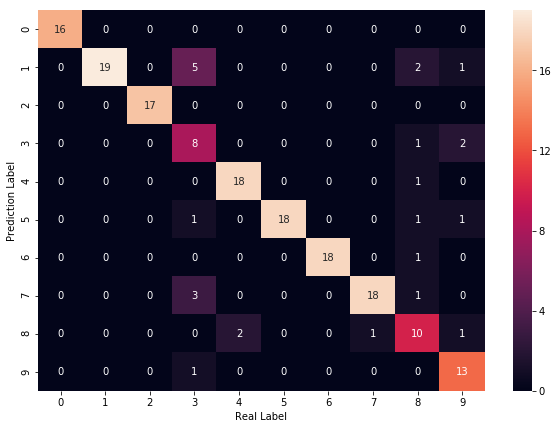

In [14]:
import seaborn as sn


df_cm = pd.DataFrame(cm, index = [i for i in "0123456789"],
                  columns = [i for i in "0123456789"])
plt.figure(figsize = (10,7))
sn.heatmap(df_cm, annot=True)
plt.xlabel('Real Label')
plt.ylabel('Prediction Label')
plt.show()

In [15]:
list_P = []
for i,p_value in enumerate(pred_value):
    print("#{} min_error:{} index:{} real:{}".format(i, error_list[i], p_value[0], digits.target[1617+i]))

#0 min_error:24 index:[5] real:5
#1 min_error:29 index:[2] real:2
#2 min_error:30 index:[8] real:8
#3 min_error:6 index:[0] real:0
#4 min_error:17 index:[1] real:1
#5 min_error:25 index:[7] real:7
#6 min_error:14 index:[6] real:6
#7 min_error:20 index:[3] real:3
#8 min_error:16 index:[2] real:2
#9 min_error:17 index:[1] real:1
#10 min_error:28 index:[7] real:7
#11 min_error:30 index:[1 8] real:4
#12 min_error:10 index:[6] real:6
#13 min_error:17 index:[3] real:3
#14 min_error:16 index:[1] real:1
#15 min_error:28 index:[3] real:3
#16 min_error:25 index:[1] real:9
#17 min_error:15 index:[1] real:1
#18 min_error:25 index:[8] real:7
#19 min_error:5 index:[6] real:6
#20 min_error:29 index:[8] real:8
#21 min_error:13 index:[4] real:4
#22 min_error:17 index:[3] real:3
#23 min_error:16 index:[1] real:1
#24 min_error:16 index:[4] real:4
#25 min_error:11 index:[0] real:0
#26 min_error:14 index:[5] real:5
#27 min_error:13 index:[3] real:3
#28 min_error:23 index:[6] real:6
#29 min_error:24 index:[

In [16]:
pred_value = []
error_list = []

for j in range(1617):
    pred = []
    for i in range(necoc):
        [pred_outputs, real_outputs] = get_pred_real(i, j)
        #print(pred_outputs, real_outputs)
        pred.append(pred_outputs)
    #print(np.array(pred).T)
    
    error = []
    for i in range(10):
        error.append(10 - np.sum(number_codes[i] == np.array(pred).T))
    #print(error)
    
    pred_value.append(np.where(error==np.min(error)))
    error_list.append(np.min(error))
    #print(np.where(error==np.min(error)) )

list_P = []
for i in pred_value:
    if (len(i[0])) == 1:
        list_P.append(i[0][0])
    else:
        random_pick = randint(0, len(i[0])-1)
        list_P.append(i[0][random_pick])
print("Testset acc:{}".format(np.sum(list_P == digits.target[:1617])/1617))
winner_fitness = []
for winner in winner_list:
    #print(winner.fitness)
    winner_fitness.append(winner.fitness)
print("Avg Base Learner:{}".format(np.mean(winner_fitness)))

Testset acc:0.8899196042053185
Avg Base Learner:0.8076932591218303


In [17]:
# program to check if there is exist a path between two vertices 
# of a graph 

from collections import defaultdict 

#This class represents a directed graph using adjacency list representation 
class Graph: 

	def __init__(self,vertices): 
		self.V= vertices #No. of vertices 
		self.graph = defaultdict(list) # default dictionary to store graph 

	# function to add an edge to graph 
	def addEdge(self,u,v): 
		self.graph[u].append(v) 
	
	# Use BFS to check path between s and d 
	def isReachable(self, s, d): 
		# Mark all the vertices as not visited 
		visited =[False]*(self.V) 

		# Create a queue for BFS 
		queue=[] 

		# Mark the source node as visited and enqueue it 
		queue.append(s) 
		visited[s] = True

		while queue: 

			#Dequeue a vertex from queue 
			n = queue.pop(0) 
			
			# If this adjacent node is the destination node, 
			# then return true 
			if n == d: 
				return True

			# Else, continue to do BFS 
			for i in self.graph[n]: 
				if visited[i] == False: 
					queue.append(i) 
					visited[i] = True
		# If BFS is complete without visited d 
		return False
    
    
def findAllPath(graph,start,end,path=[]):
    path = path +[start]
    if start == end:
        return [path]
 
    paths = [] #存储所有路径    
    for node in graph[start]:
        if node not in path:
            newpaths = findAllPath(graph,node,end,path) 
            for newpath in newpaths:
                paths.append(newpath)
    return paths

numbers = [*range(2)]
number_of_classification = len(numbers)

list_nodes_number = []
list_connection_number = []

for winner in winner_list:
    used_nodes = list(winner.nodes.keys())
    # create a dict for mapping 
    l1 = numbers + config.genome_config.input_keys + used_nodes[number_of_classification:]
    l2 = range(len(l1))
    dict_nodes = dict(zip(l1, l2))

    ### 将节点加入图
    g = Graph(len(l1))# inputs + outputs + used  
    # add connections in the graph
    for cg in winner.connections.values():
        if cg.enabled:
            g.addEdge(dict_nodes[cg.key[0]],dict_nodes[cg.key[1]])

    v = numbers
    list_connections = []
    for vi in v:
        for u in range(number_of_classification, len(config.genome_config.input_keys) + number_of_classification):
            list_connections.append(g.isReachable(u, vi))

    nodes_inputs = range(number_of_classification, number_of_classification+ 64)
    nodes_outputs = range(number_of_classification)
    nodes_mid = range(number_of_classification + 64, len(dict_nodes))

    # 找到所有输入和输出连接的路
    all_path = []
    for u in nodes_inputs:
        for v in nodes_outputs:
            path = findAllPath(g.graph, u, v)
            if path:
                all_path = all_path + path

    # 得到最长路，以及每个节点在哪个层级
    max_length = max([len(x) for x in all_path])
    nodes_tuples_list = []
    for path in all_path:
        #print(path)
        for node in path:
            nodes_tuples_list.append([node, path.index(node)])

    # 确定节点的层级（消除重复）       
    nodes_tuples_fixed_list = []
    for index in range(max_length):
        for nodes in nodes_tuples_list:
            node, node_index = nodes[0], nodes[1]
            if node_index == index: 
                if nodes not in nodes_tuples_fixed_list:
                    nodes_tuples_fixed_list.append(nodes)


    # 所有有连接的节点
    all_used_nodes = []
    for node in nodes_tuples_fixed_list:
        if node[0] not in all_used_nodes:
            all_used_nodes.append(node[0])

    # 确定节点的层级（最终确定）
    nodes_tuples_fixed_list_final = []

    for node in all_used_nodes:
        if node in nodes_inputs:
            nodes_tuples_fixed_list_final.append([node, 0])
        elif node in nodes_outputs:
            nodes_tuples_fixed_list_final.append([node, max_length - 1])
        else:
            list_node = []
            for nodes in nodes_tuples_fixed_list:
                if node == nodes[0]:
                    list_node.append(nodes)
            layer = 0
            for ele in list_node:
                # 删除重复项，取最大
                if ele[1] > layer:
                    layer = ele[1]
            nodes_tuples_fixed_list_final.append([node,layer])


    # 每个层级的节点合数
    length_of_layers = []
    number_of_nodes = 0
    for index in range(max_length):
        for nodes in nodes_tuples_fixed_list_final:
            node, node_index = nodes[0], nodes[1]
            if node_index == index: 
                number_of_nodes += 1
        length_of_layers.append(number_of_nodes)

    length_of_each_layer = []
    length_of_each_layer.append(length_of_layers[0])
    for i in range(1, max_length):
        length_of_each_layer.append(length_of_layers[i] - length_of_layers[i-1])

    # 输出每个层级的节点个数
    #print("length of each layers:", length_of_each_layer)

    # 所有端到端的路
    all_path_side2side = []
    for path in all_path:
        if len(path) == 2:
            all_path_side2side.append(path)
        else:
            for i in range(len(path)-1):
                all_path_side2side.append([path[i],path[i+1]])

    # 定义节点到绘图的字典
    dict_nodes_graph = dict()
    count_number_layer = [0] * max_length
    for nodes in nodes_tuples_fixed_list_final:
        node, layer = nodes
        dict_nodes_graph[node] = [count_number_layer[layer], layer]
        count_number_layer[layer] += 1
    list_nodes_number.append(np.sum(length_of_each_layer))
    list_connection_number.append(len(all_path_side2side))
    #print("Number of nodes:{} Number of connections:{}".format(np.sum(length_of_each_layer),len(all_path_side2side)))
print("Total nodes:{} Total connections::{}".format(np.sum(list_nodes_number), np.sum(list_connection_number)))

Total nodes:2101 Total connections::2671


In [18]:
def get_pred_real(i, j):
    winner_net = neat.nn.FeedForwardNetwork.create(winner_list[i], config)
    
    numbers = [*range(26)]
    class1 = classes[i]
    class2 = []
    class1_indexes = []
    class2_indexes = []
    
    test_X = digits.images.reshape(digits.images.shape[0], digits.images.shape[1] * digits.images.shape[2])[j]
    test_y = digits.target[j]

    list_y = [test_y]
    digits_indexes = []
    for digit in numbers:
        li = [i for i in range(len(list_y)) if list_y[i] == digit]
        digits_indexes.extend([li])

    for i in numbers:
        if i in class1:
            class1_indexes.extend(digits_indexes[i])
        else:
            class2_indexes.extend(digits_indexes[i])
            class2.append(i)

    class1_label = [1] * len(class1_indexes)
    class2_label = [0] * len(class2_indexes)


    testsamplesize = 1
    test_x_inputs =[tuple(test_X)]
    test_x_outputs = [tuple([c]) for c in class1_label + class2_label]

    outputs = []
    for xi in test_x_inputs:
        output = winner_net.activate(xi)
        outputs.append(output)

    px_outputs = softmax(np.array(outputs).reshape(testsamplesize, 2), axis=1)
    
    # the index of maximum in each line
    return px_outputs

In [19]:
from random import randint
pred_value = []
error_list = []

for j in range(1617,1617+180):
    pred = []
    for i in range(necoc):
        pred_outputs = get_pred_real(i, j)
        pred.append(pred_outputs)
    
    error = []
    for i in range(10):
        loss = 0
        for ii in range(len(pred)):
            #print(number_codes[0][ii], pred[ii][0])
            #print (pred[ii][0][number_codes[0][ii]])
            #loss += (1 - pred[ii][0][number_codes[i][ii]])**2
            z = pred[ii][0][number_codes[i][ii]]
            
            #loss += np.log(1 + np.exp(-z)) # c45
            #loss += np.exp(-z)# adaboost
            loss += (1-z)**2
        error.append(loss)
    
    pred_value.append(np.where(error==np.min(error)))

list_P = []
for i in pred_value:
    if (len(i[0])) == 1:
        list_P.append(i[0][0])
    else:
        random_pick = randint(0, len(i[0])-1)
        list_P.append(i[0][random_pick])
np.sum(list_P == digits.target[1617:])/180

0.8388888888888889